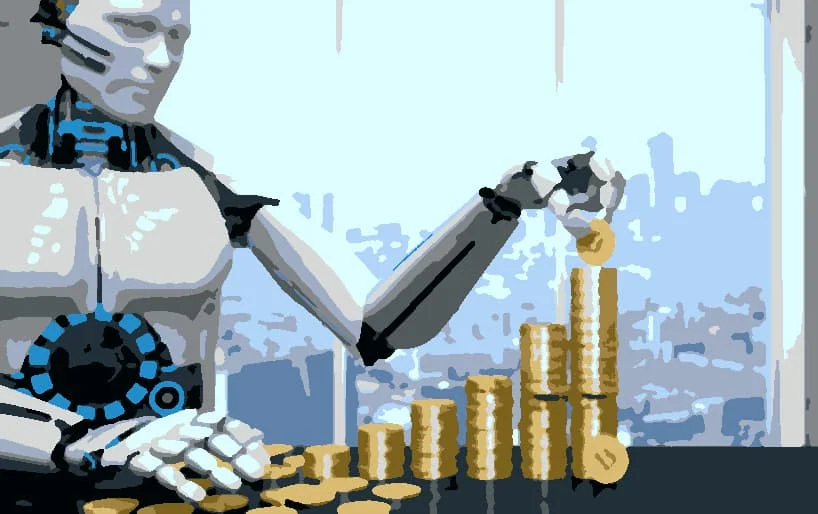

#   <span style="font-size: 45px; background-color: pink; padding: 10px;">Data Science Project on ProtugeseBank</span>

- Name - Abhishek Kumar
- Email - ak352319@gmail.com

###   <span style="font-size: 20px; background-color: #b5a642; padding: 10px;">Problem Statement</span>

- Task 1:-Prepare a complete data analysis report on the given data.
-------------------

- Task 2:-Create a predictive model which will help the bank marketing team to know which customer will buy the product.
------------------------------------------

- Task3:-Suggestions to the Bank market team to make  customers  buy the product.


###  <span style="font-size: 15px; background-color: #d19fe8; padding: 10px;">All features of dataset</span>

#### Attribute Information:
**Input variables:**
- 1 - age (numeric)
- 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- 5 - default: has credit in default? (categorical: 'no','yes','unknown')
- 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
- 7 - loan: has personal loan? (categorical: 'no','yes','unknown')
---------------------------
**related with the last contact of the current campaign:**
- 8 - contact: contact communication type (categorical: 'cellular','telephone')
- 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
-----------------------------
**other attributes:**
- 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- 14 - previous: number of contacts performed before this campaign and for this client (numeric)
- 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
--------------------------------------
***social and economic context attributes***
- 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
- 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
- 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
- 20 - nr.employed: number of employees - quarterly indicator (numeric)
**Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


### Business Priblem
- **This dataset is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution from May 2008 to November 2010.**

- This is binary classification goal is to predict if the client will subscribe a bank term deposit.

 ###  <span style="font-size: 25px; background-color: #007fff; padding: 10px;">Import all Necessary Libraries</span>

In [1]:
import numpy as np               # NumPy for numerical operations
import pandas as pd              # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for data visualization
import seaborn as sns            # Seaborn for enhanced data visualization
%matplotlib inline 


# Import 'warnings' module to manage warning messages in Python.
import warnings
warnings.filterwarnings('ignore')

#### <span style="font-size: 25px; background-color: #007fff; padding: 10px;">Importing ProtugeseBank Dataset</span>

In [2]:
bank_data = pd.read_csv('bank-additional-full.csv',sep=';',na_values='unknown') # dataset importing
pd.set_option('display.max_columns',None)                       # it will display total column of dataset
# pd.set_option('display.max_rows',None)                          # it will display total row of dataset

- Data was not seprated, then i seprate data using 'sep=' parameter by semicolon 

## <span style="font-size: 25px; background-color: #b5a642; padding: 10px;">Basics Check</span>

In [3]:
# Display top 5 rows , it's default.
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Display last 5 rows , It's default.
bank_data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
# display random rows of dataset- By default it will shows 1 rows
bank_data.sample() #bank_data.sample(5)- it will show randomly 5 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29434,36,blue-collar,divorced,basic.6y,no,yes,no,cellular,apr,mon,339,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no


In [6]:
# Generate summary statics of dataset
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


 - std - There is no constant value
 - min - No corrupted value

In [7]:
# Generate summary statistics for object columns in the bank_dataset.
# This will provide information about the distribution of non-numeric data, including counts,
# unique values, and the most frequent value in each categorical column.

bank_data.describe(include='O').T

,count,unique,top,freq
job,40858,11,admin.,10422
marital,41108,3,married,24928
education,39457,7,university.degree,12168
default,32591,2,no,32588
housing,40198,2,yes,21576
loan,40198,2,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [8]:
# understand dataset structure and properties
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

- here info of all feature dtype 
   - int64  - 5  column
   - object - 11 column
   - float64- 5  column
- total 21 columns are present in dataset

In [9]:
# checking null value 
bank_data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

- Here we can see that many  column has missing value like- job, marital, education, default, housing, loan.

In [10]:
bank_data.shape

(41188, 21)

dataset has 
- row - 41188
- column - 21


## <span style="font-size: 25px; background-color: pink; padding: 10px;">Now the Domain-Analysis will have to be done</span>

- In domain analysis we will write all information about every input features in dataset that how he is effecting on output fature.

### 1 - age:
     - this is represent age of client in dataset.
----------------------------------------------------
### 2 - job :
     - type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
     - This is type of job that wihich type of job clients are doing
----------------------------------------------------------
### 3 - marital :
     - marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
     - It's marital status of client that client is married of unmarried
 -----------------------------------------------------
### 4 - education
     - basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree','unknown')
     - This is represent type of education qualification about client
-------------------------------------------------------------
### 5 - default:
      - has credit in default? (categorical: 'no','yes','unknown'
      - This is represent client has credit in default or not.
---------------------------------------------------------------
###  6 - housing: 
     - has housing loan? (categorical: 'no','yes','unknown')
     - it's represent the client has housing loan or not.
----------------------------------------
### 7-  loan: 
     - has personal loan? (categorical: 'no','yes','unknown')
     - This is represent client has taken personal loan or not
 -------------------------------------------

### 8 - contact:
     - contact communication type (categorical: 'cellular','telephone')
     - This is represent the communication type of client wheather client is communicate from phone or cellular
--------------------------------------------------------------
### 9 - month:
     - last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
     - this is represent the concat of client that when client contact.
-----------------------------------------------------------------
### 10 - day_of_week: 
     - last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
     - This is represent which daya of week client has contact.
   ----------------------------------------------------------
### 11 - duration: 
     - last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
 ----------------------------------------------------------------
### 12 - campaign: 
      - number of contacts performed during this campaign and for this client (numeric, includes last contact)
      - this is represent during **campaign** how many contact of client performed.
  ----------------------------------------------------------------
### 13 - pdays: 
      - number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
      - this is represent that when client was last contact from previous campaign
  -------------------------------------------------------
### 14 - previous: 
      - number of contacts performed before this campaign and for this client (numeric)
      - this is represent before the campaign how many number of contact performed for client.
 ----------------------------------------------------
### 15 - poutcome: 
      - outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
      - this is represnent previous outcome of marketing campaign wheather it is falil ,nonexistent or sucess.
 ---------------------------------------------------

### 16 - emp.var.rate:
     - employment variation rate - quarterly indicator (numeric)
     - this is represent the client has how many variation of employement.
-----------------------------------------------------
### 17 - cons.price.idx: 
     - consumer price index - monthly indicator (numeric)
     - represent monthly price index of client .
-------------------------------------------------------------
### 18 - cons.conf.idx: 
     - consumer confidence index - monthly indicator (numeric)
 --------------------------------------------------------------
### 19 - euribor3m:
     - euribor 3 month rate - daily indicator (numeric)
     - The Euribor 3-month rate is a daily indicator of the average interest rate at which eurozone banks offer unsecured short-term loans to one another. It is calculated by the European Money Markets Institute (EMMI) based on the interest rates submitted by a panel of 57 banks. The Euribor 3-month rate is used as a benchmark interest rate for a variety of financial products, including floating-rate loans, mortgages, and derivatives.
-------------------------------------------------------------
### 20 - nr.employed:
     - number of employees - quarterly indicator (numeric)
     
--------------------------------------------------------
### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


# <span style="font-size: 30px; background-color: #007fff; padding: 10px;">EDA (Exploratory data Analysis)</span>

  - it is most important part of machine learning project 
  - In EDA we will do analysis about all the features in given dataset.
 - there is some step in EDA
    - Univariate analysis - it's analyze one column in one time
    - Bivariate analysis -  it's analyze two column in one time
    - multivariate analysis-it's analuze more than two column in one time.

## <span style="font-size: 27px; background-color: #21abcd; padding: 10px;">Univariate Analysis</span>

  - Univariate Analysis is a type of data visualization where we visualize only a single variable at a time
  - we will plot all feature by using some graph.
  - Here some data are categorical and some are numerical according to the feature we will use some graph.
  - Here we will do analysis one-by-one of all features that is given in dataset. 

In [11]:
bank_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### first we will perform univariate on numerical column

In [12]:
# extracting numerical column 'int64' and 'float64' from dataset
num_col = [num for num in bank_data.columns if bank_data[num].dtypes == 'int64' or bank_data[num].dtypes == 'float64']

print(f"Numerical column:-    {num_col}")

Numerical column:-    ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


### age

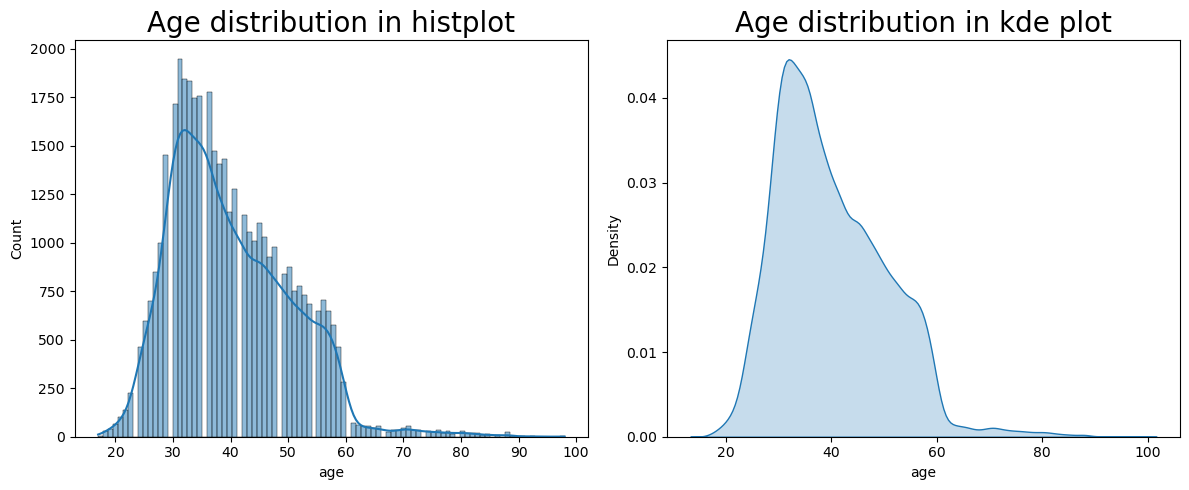

In [13]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='age', ax=axes[0], kde=True)
axes[0].set_title('Age distribution in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='age', ax=axes[1],shade=True ) 
axes[1].set_title('Age distribution in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **Here higher count of client which has age from 28 to 40**

### duration

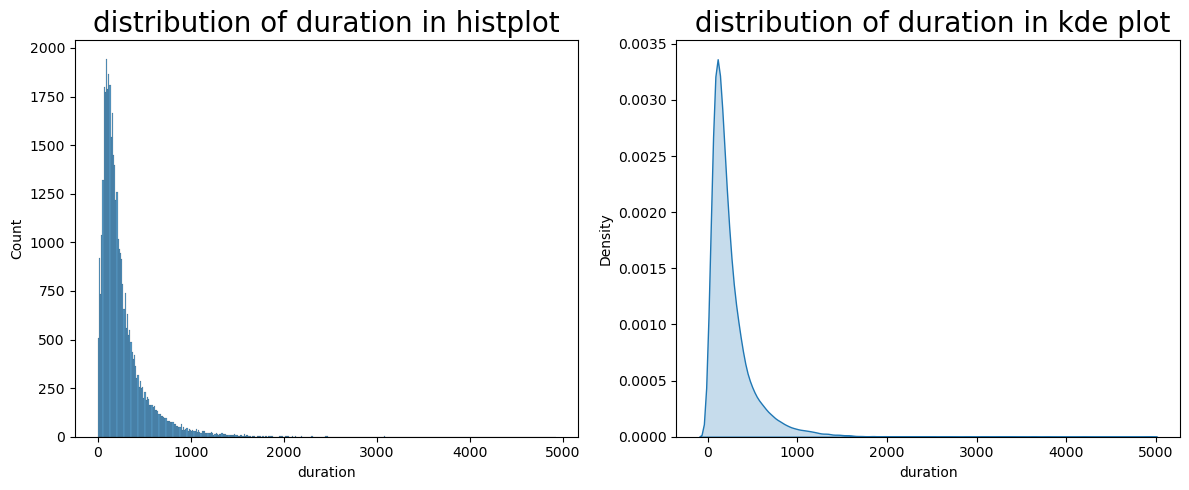

In [14]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='duration', ax=axes[0])
axes[0].set_title('distribution of duration in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='duration', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of duration in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **Higher count of duration is from 0 to 1000 point**

### campaign

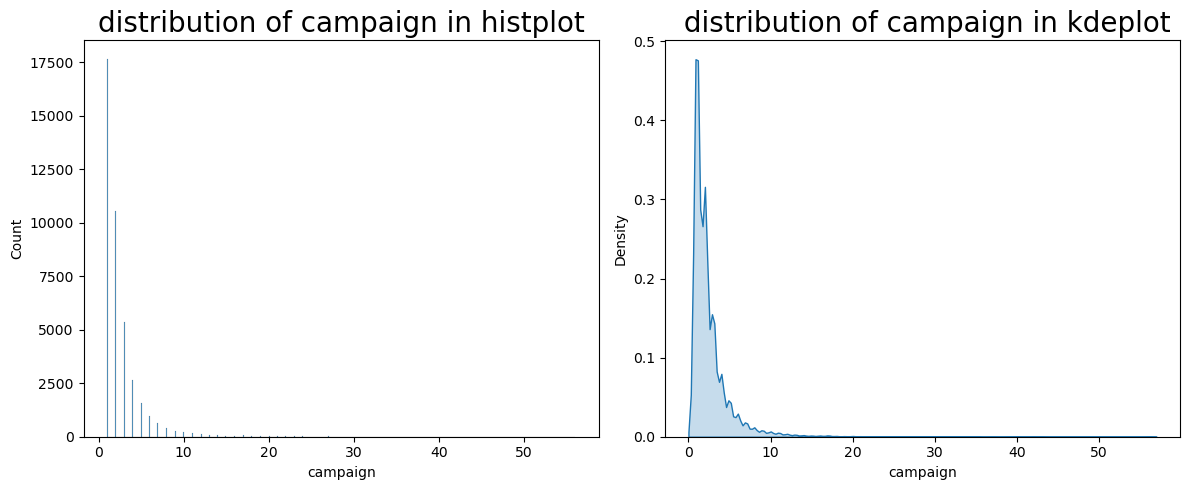

In [15]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='campaign', ax=axes[0])
axes[0].set_title('distribution of campaign in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='campaign', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of campaign in kdeplot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **The higher count of campaign is from 0 to 2** 

### pdays

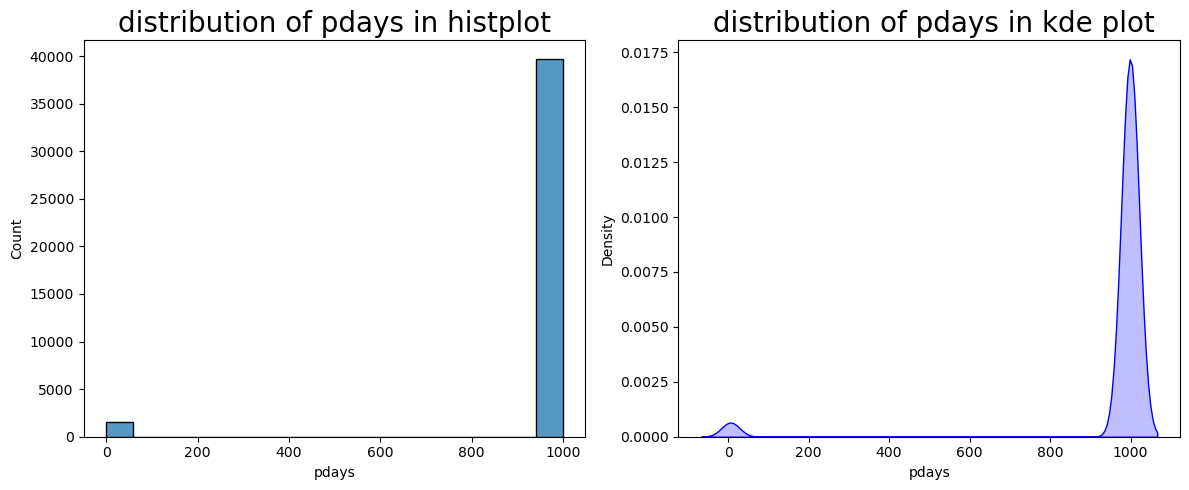

In [16]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='pdays', ax=axes[0])
axes[0].set_title('distribution of pdays in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='pdays', ax=axes[1],shade=True,color='blue' ) 
axes[1].set_title(' distribution of pdays in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the highe count of pdays at 1000 point.**

### previous

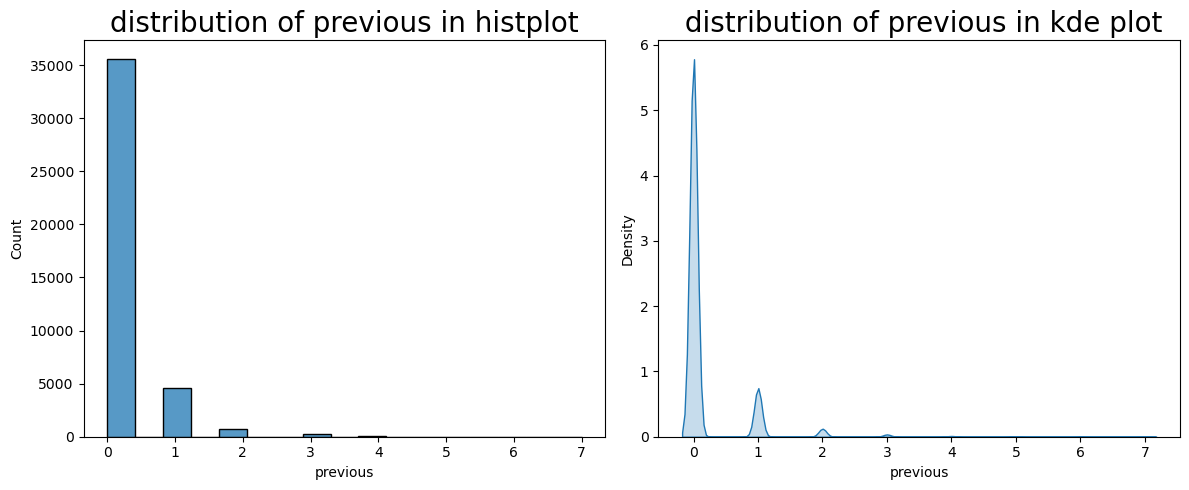

In [17]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='previous', ax=axes[0])
axes[0].set_title('distribution of previous in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='previous', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of previous in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the higher count of prevoous at 0.**

### emp.var.rate

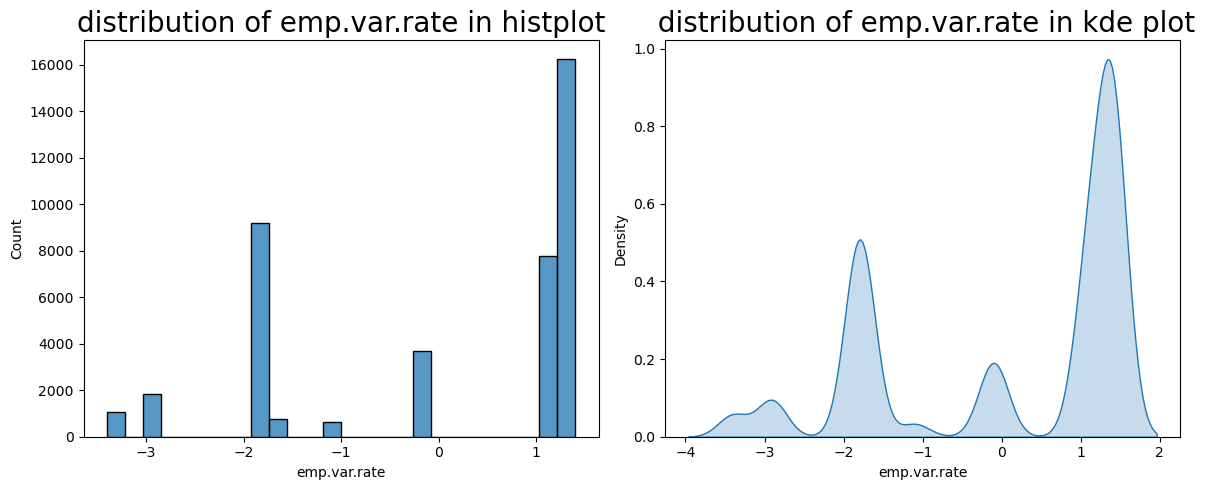

In [18]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='emp.var.rate', ax=axes[0])
axes[0].set_title('distribution of emp.var.rate in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='emp.var.rate', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of emp.var.rate in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the higher count of emp.var.rate at 1 point.**

### cons.price.idx

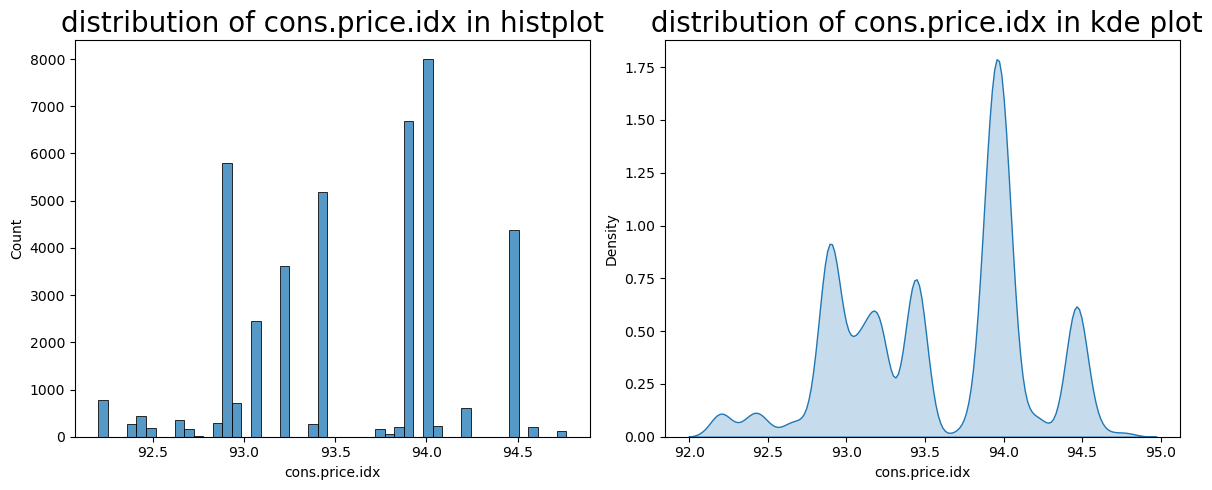

In [19]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='cons.price.idx', ax=axes[0])
axes[0].set_title('distribution of cons.price.idx in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='cons.price.idx', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of cons.price.idx in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the higher count of cons.price.idx at 94.**

### cons.conf.idx'

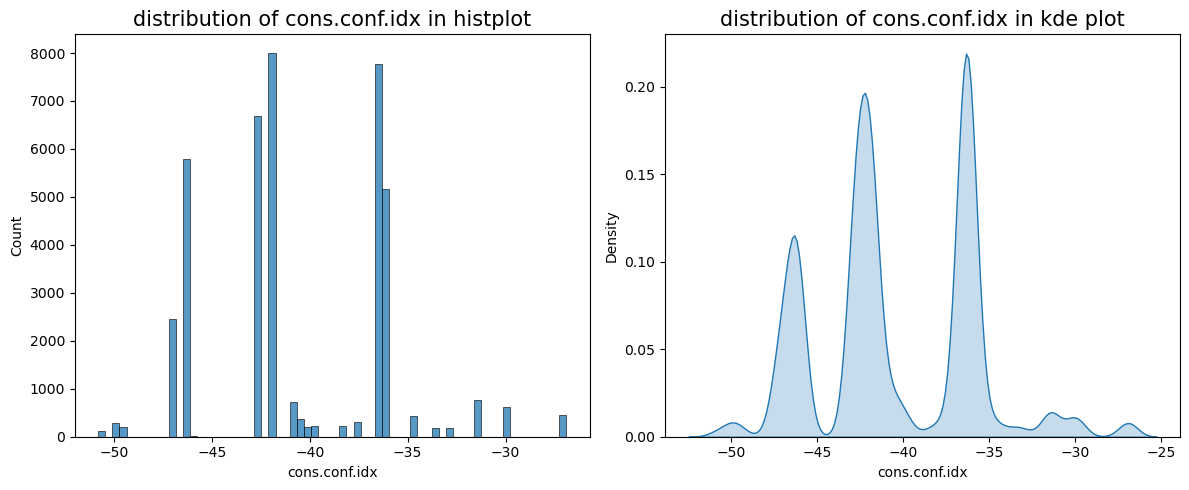

In [20]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='cons.conf.idx', ax=axes[0])
axes[0].set_title('distribution of cons.conf.idx in histplot',fontsize=15)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='cons.conf.idx', ax=axes[1],shade=True ) 
axes[1].set_title('distribution of cons.conf.idx in kde plot',fontsize=15)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **this is all negative point and max count of cons.conf.idx at -35**

### euribor3m

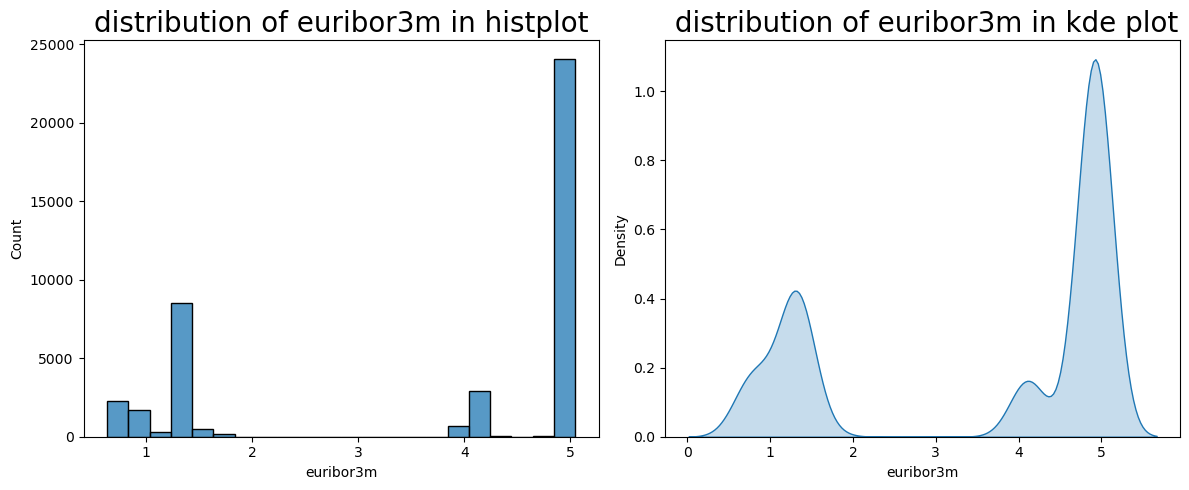

In [21]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='euribor3m', ax=axes[0])
axes[0].set_title('distribution of euribor3m in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='euribor3m', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of euribor3m in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the higher count of euribor3m at 5**

### nr.employed

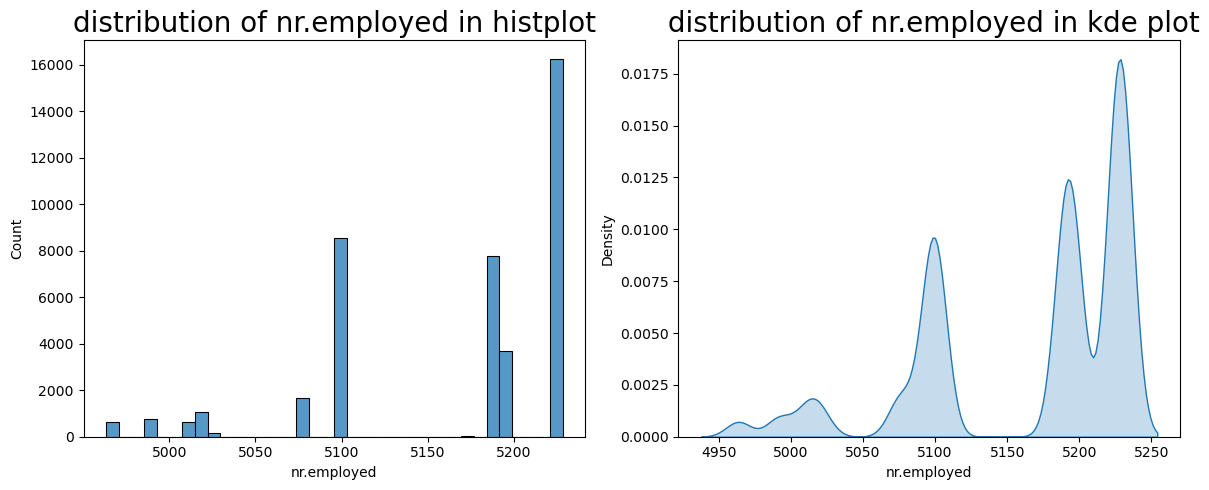

In [22]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ploting a histogram
sns.histplot(data=bank_data, x='nr.employed', ax=axes[0])
axes[0].set_title('distribution of nr.employed in histplot',fontsize=20)

# Ploting a KDE plot
sns.kdeplot(data=bank_data, x='nr.employed', ax=axes[1],shade=True ) 
axes[1].set_title(' distribution of nr.employed in kde plot',fontsize=20)

# Adjust layout
plt.tight_layout()
# Show the combined plot
plt.show()


- **the hogher count of nr.employed from 5200 to 5250**

### now we will perform univariate in categorical column of dataset

In [23]:
# extracting categirical column from dataset.
cat_col = [cat for cat in bank_data.columns if bank_data[cat].dtypes=='object']
print(f"Categorical Column:-    {cat_col}")

Categorical Column:-    ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


## Job

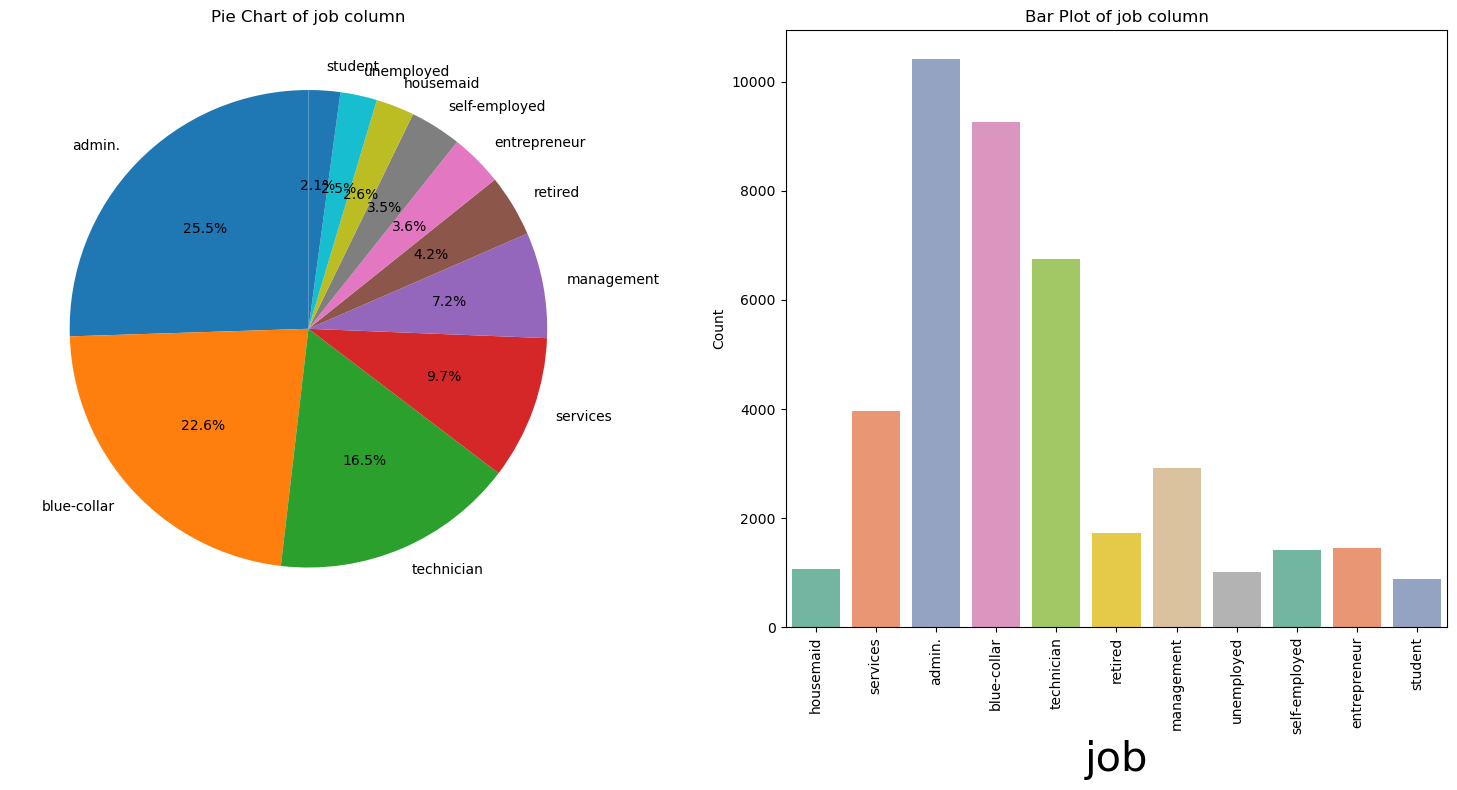

In [24]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['job'].value_counts(), labels=bank_data['job'].value_counts().index, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of job column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='job', data=bank_data, palette='Set2')
plt.xlabel('job',fontsize=30)
plt.ylabel('Count')
plt.title('Bar Plot of job column')
plt.xticks(rotation=90)

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the higher count of job is admin category.**

## marital

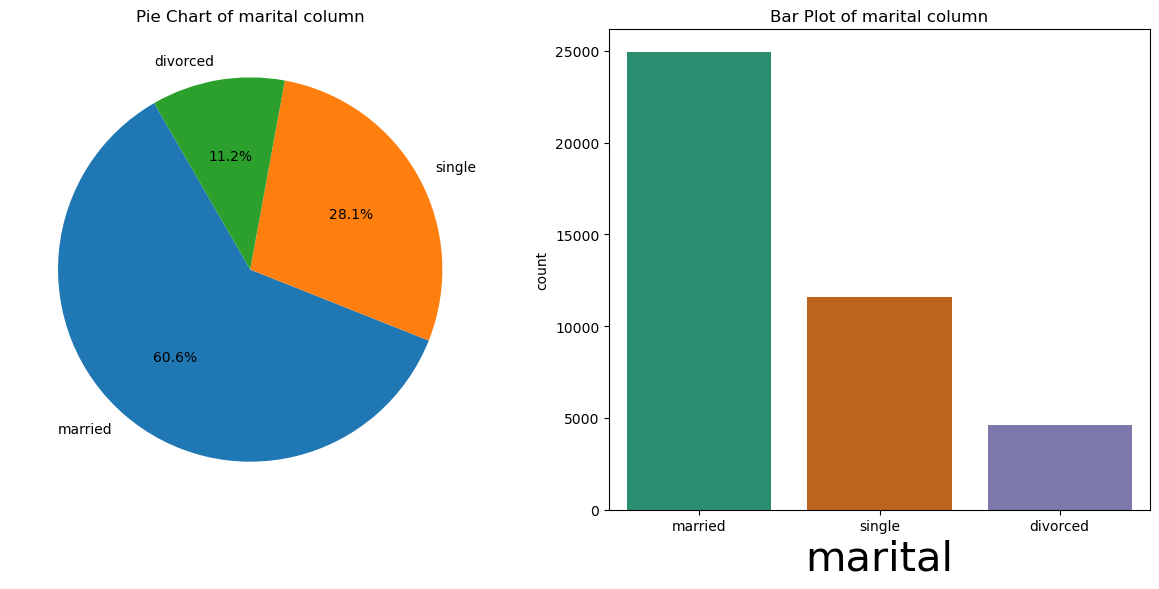

In [25]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['marital'].value_counts(), labels=bank_data['marital'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of marital column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='marital', data=bank_data, palette='Dark2')
plt.xlabel('marital',fontsize=30)
plt.title('Bar Plot of marital column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the count of married client is very higher.**

## education

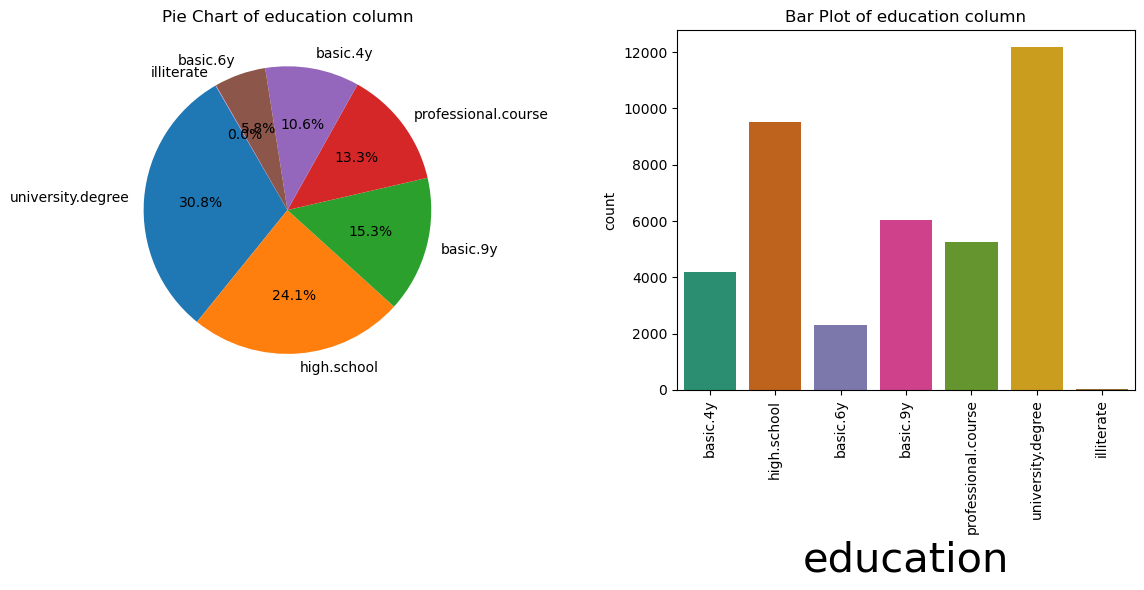

In [26]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['education'].value_counts(), labels=bank_data['education'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of education column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='education', data=bank_data, palette='Dark2')
plt.xlabel('education',fontsize=30)
plt.title('Bar Plot of education column')
plt.xticks(rotation=90)

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the higher count of education level of client which has university degree.**

## default

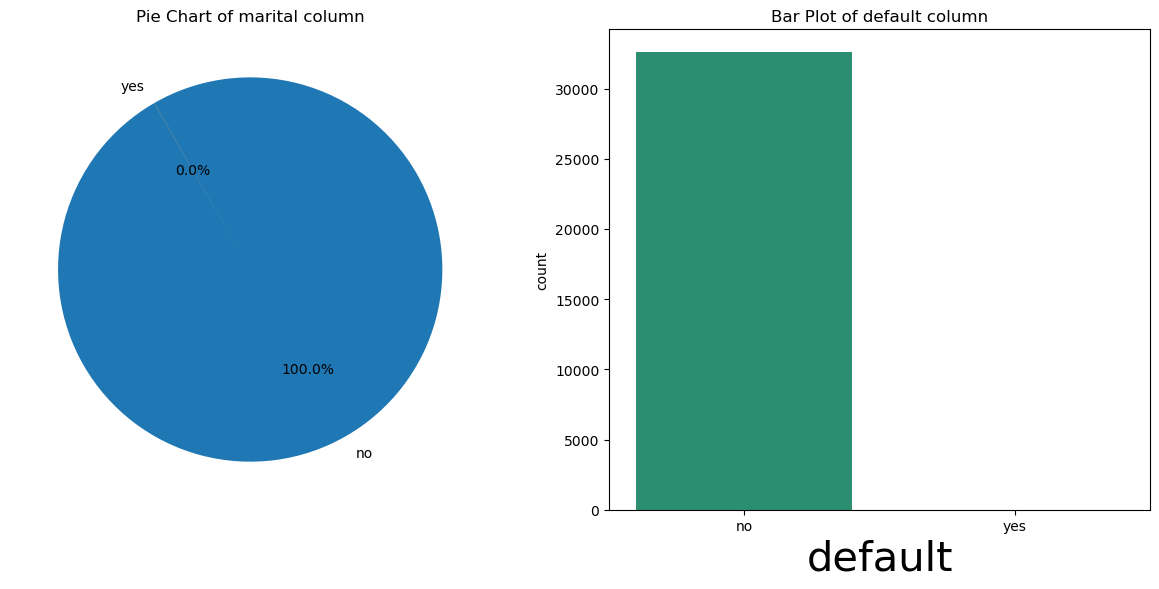

In [27]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['default'].value_counts(), labels=bank_data['default'].value_counts().index,autopct='%1.1f%%',  startangle=120)
plt.title('Pie Chart of marital column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='default', data=bank_data, palette='Dark2')
plt.xlabel('default',fontsize=30)
plt.title('Bar Plot of default column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the count of   'no'  is very hogher in default.**

## housing

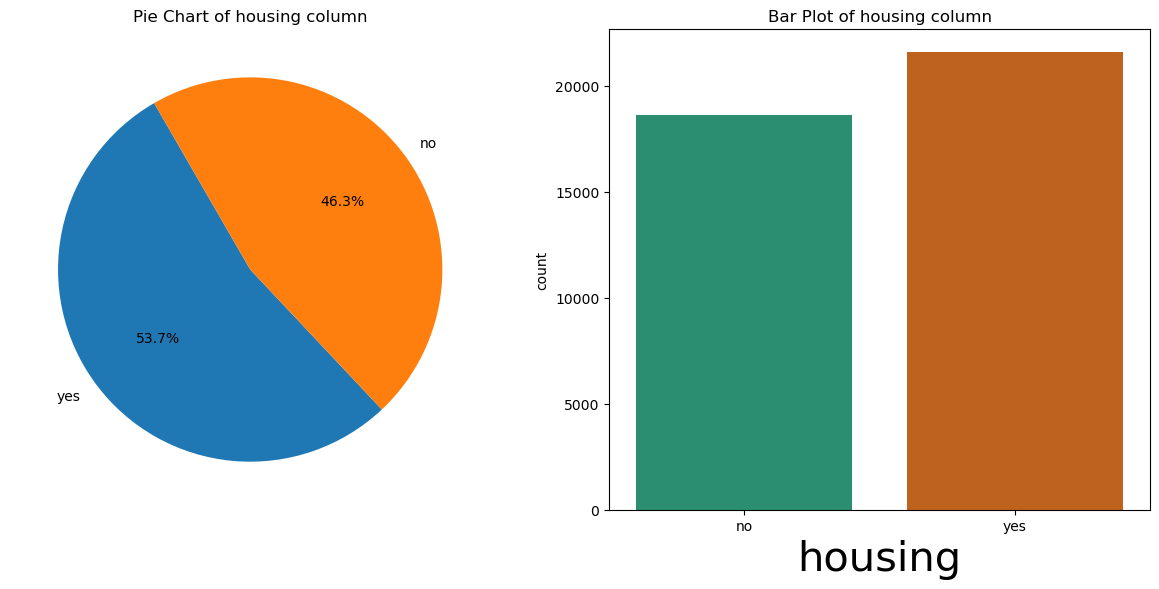

In [28]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['housing'].value_counts(), labels=bank_data['housing'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of housing column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='housing', data=bank_data, palette='Dark2')
plt.xlabel('housing',fontsize=30)
plt.title('Bar Plot of housing column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the count of client is more which one taken housing loan.**

## loan

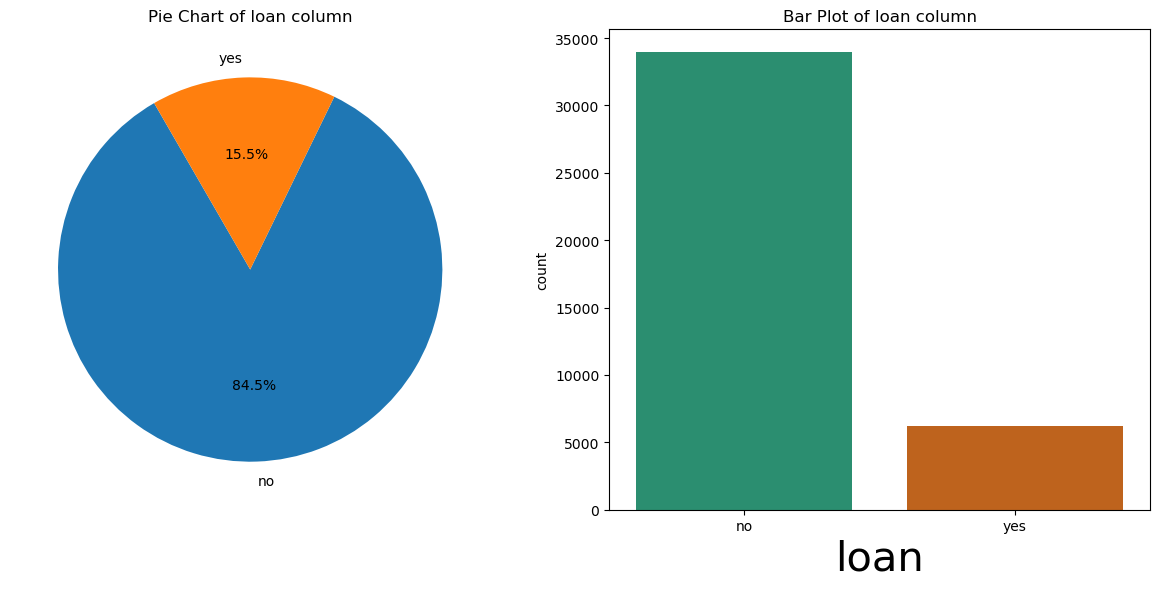

In [29]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['loan'].value_counts(), labels=bank_data['loan'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of loan column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='loan', data=bank_data, palette='Dark2')
plt.xlabel('loan',fontsize=30)
plt.title('Bar Plot of loan column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the highe count of loan which client has not taken.**

## contact

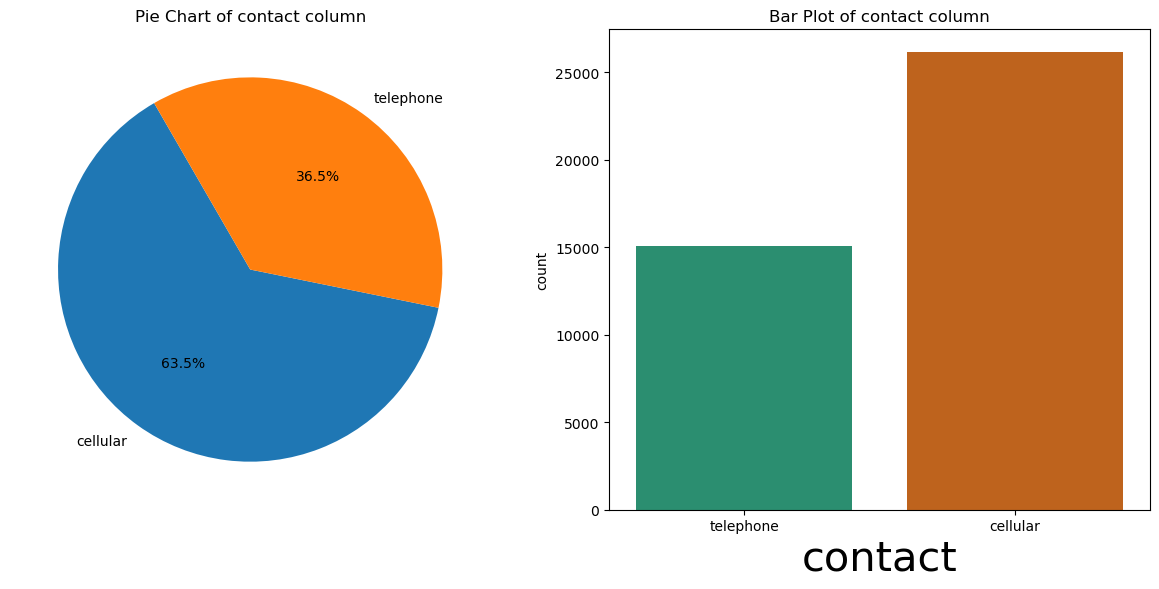

In [30]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['contact'].value_counts(), labels=bank_data['contact'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of contact column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='contact', data=bank_data, palette='Dark2')
plt.xlabel('contact',fontsize=30)
plt.title('Bar Plot of contact column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the client has more count of cellular feature.**

## month

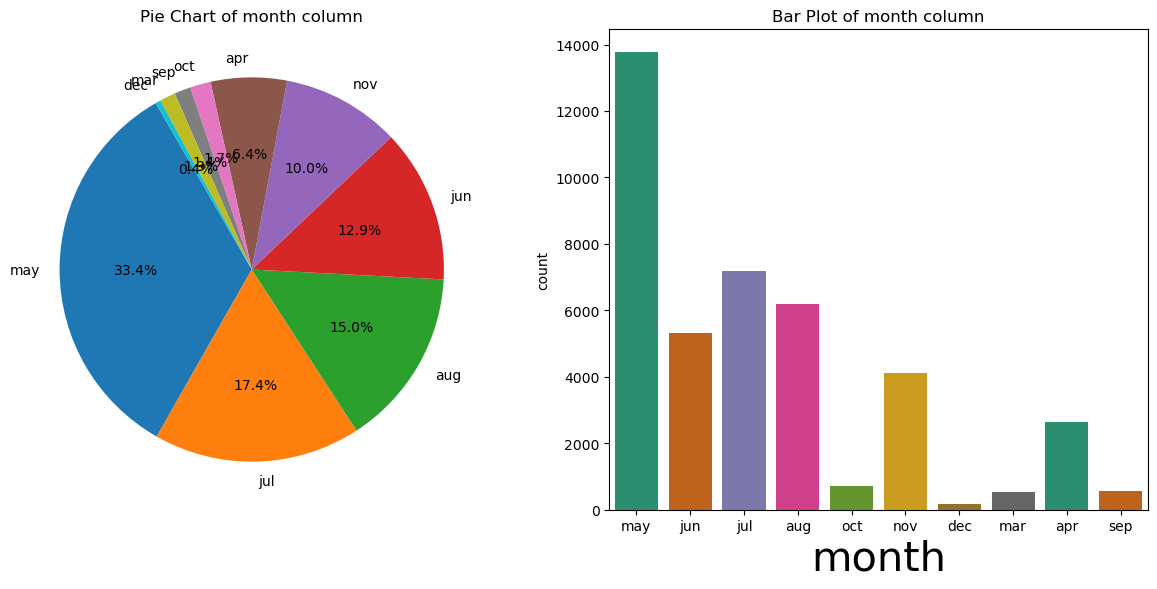

In [31]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['month'].value_counts(), labels=bank_data['month'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of month column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='month', data=bank_data, palette='Dark2')
plt.xlabel('month',fontsize=30)
plt.title('Bar Plot of month column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the may month has higher count in this column.**

## day_of_week

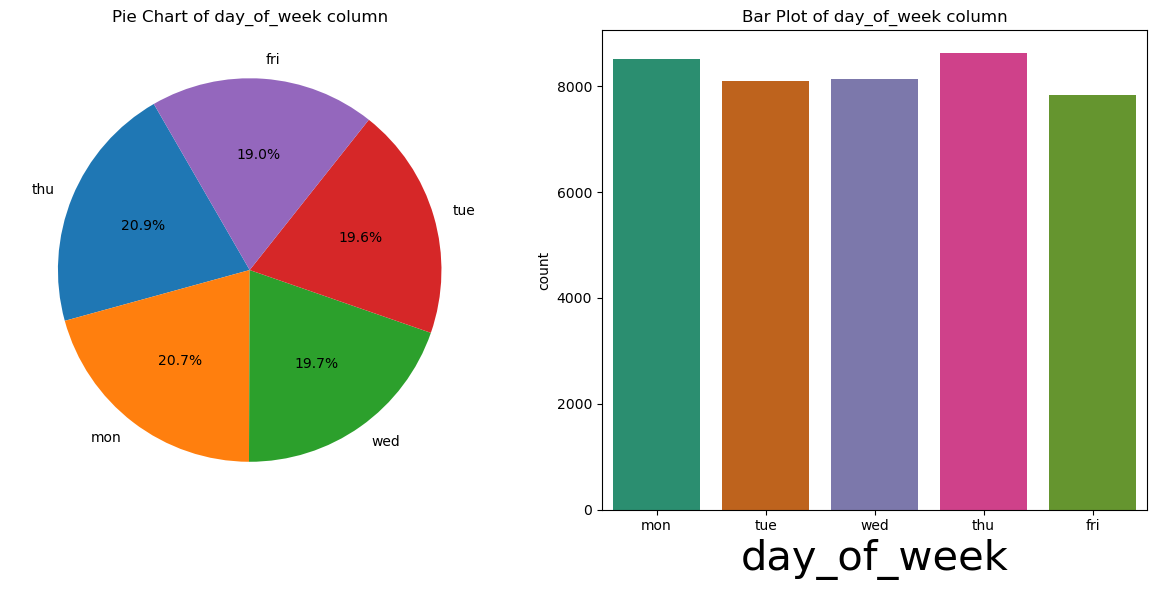

In [32]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['day_of_week'].value_counts(), labels=bank_data['day_of_week'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of day_of_week column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='day_of_week', data=bank_data, palette='Dark2')
plt.xlabel('day_of_week',fontsize=30)
plt.title('Bar Plot of day_of_week column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **the count of days of week almost same to eachother**

## poutcome

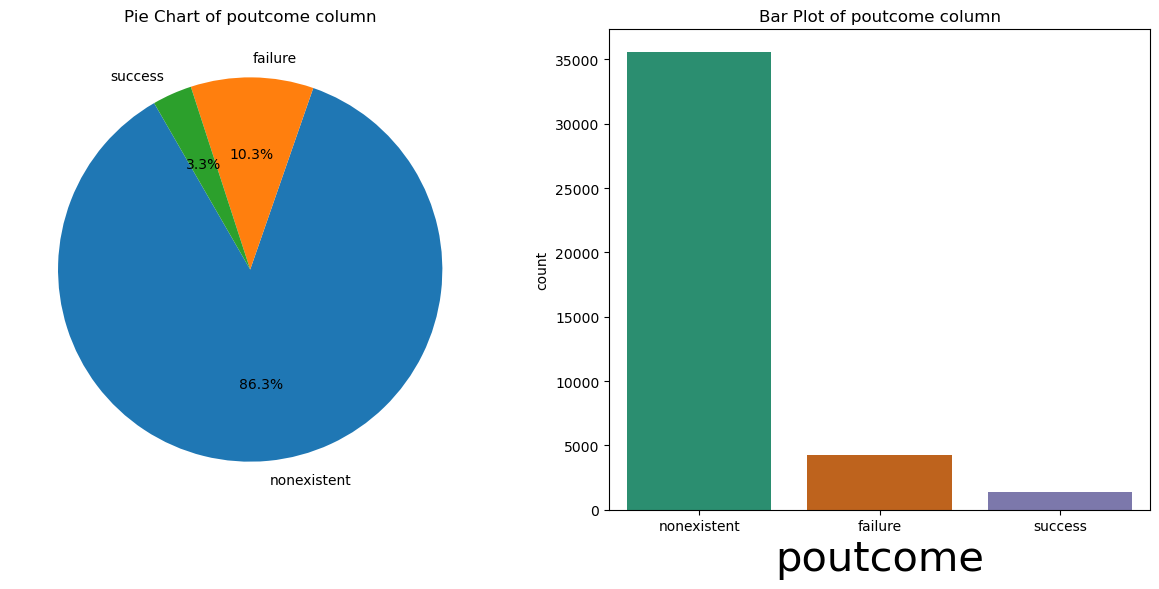

In [33]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['poutcome'].value_counts(), labels=bank_data['poutcome'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of poutcome column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='poutcome', data=bank_data, palette='Dark2')
plt.xlabel('poutcome',fontsize=30)
plt.title('Bar Plot of poutcome column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

- **very higher count of nonexistent feature in poutcome.**

## y

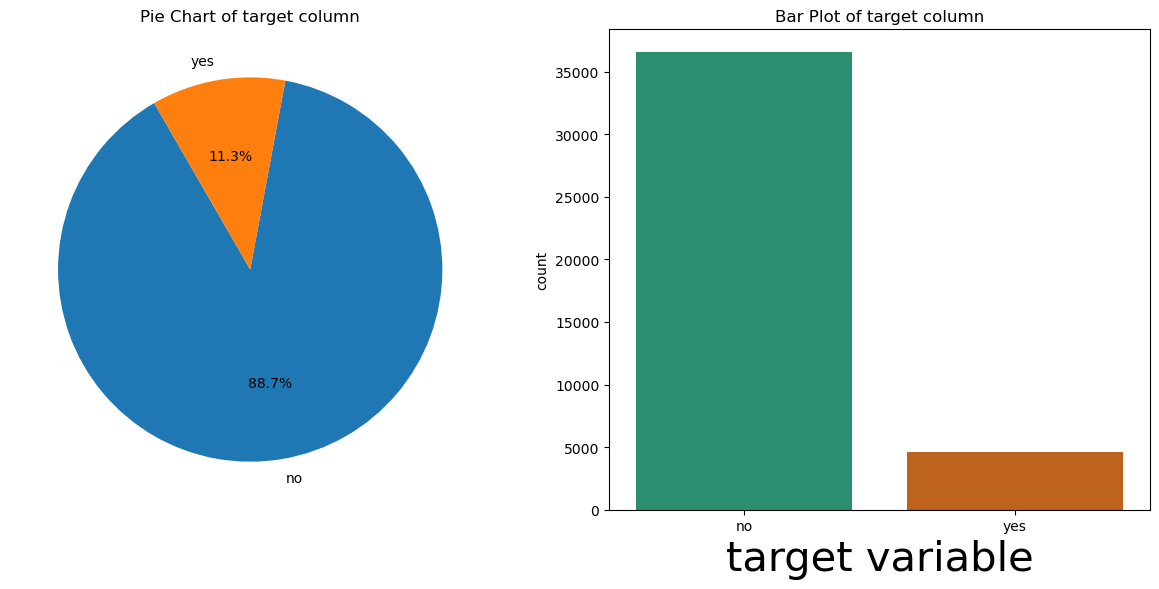

In [34]:
# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a pie chart in the first subplot
plt.subplot(1, 2, 1)
plt.pie(bank_data['y'].value_counts(), labels=bank_data['y'].value_counts().index, autopct='%1.1f%%', startangle=120)
plt.title('Pie Chart of target column')
plt.xticks(rotation=60,fontsize=5)

# Plot a bar plot in the second subplot
plt.subplot(1, 2, 2)
sns.countplot(x='y', data=bank_data, palette='Dark2')
plt.xlabel('target variable',fontsize=30)
plt.title('Bar Plot of target column')

# # Adjust subplot spacing
plt.tight_layout()

# # Show the plots 
plt.show()

## <span style="font-size: 27px; background-color: #2a52be; padding: 10px;">Let's do Bivariate analysis</span>

   - Bivariate analysis is one of the statistical analysis where two        variables are observed. One variable here is dependent while the        other is independent. These variables are usually denoted by X and      Y. So, here we analyse the changes occured between the two              variables and to what extent.
   - Bivariate allows only two columns to be analyzed at once
   - we will analyze of all input column with output column
   - we will display Bivariate graph by using some plot for visulyse the relation between two features.
   - Also we will write insight about data distribution

## 1- We will do bivarient analysis all categorical column vs target variable

In [35]:
# plt.figure(figsize=(30,15))
# sns.histplot(bank_data, hue='y',x='age')
# sns.displot(bank_data, x = 'age', hue='y')
# plt.title('resting_ekg_results vs heart_disease_present')
# plt.xticks(rotation=120)
# plt.show()
#  # Move the legend to a different location

Categorical Columns I used to plot it: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


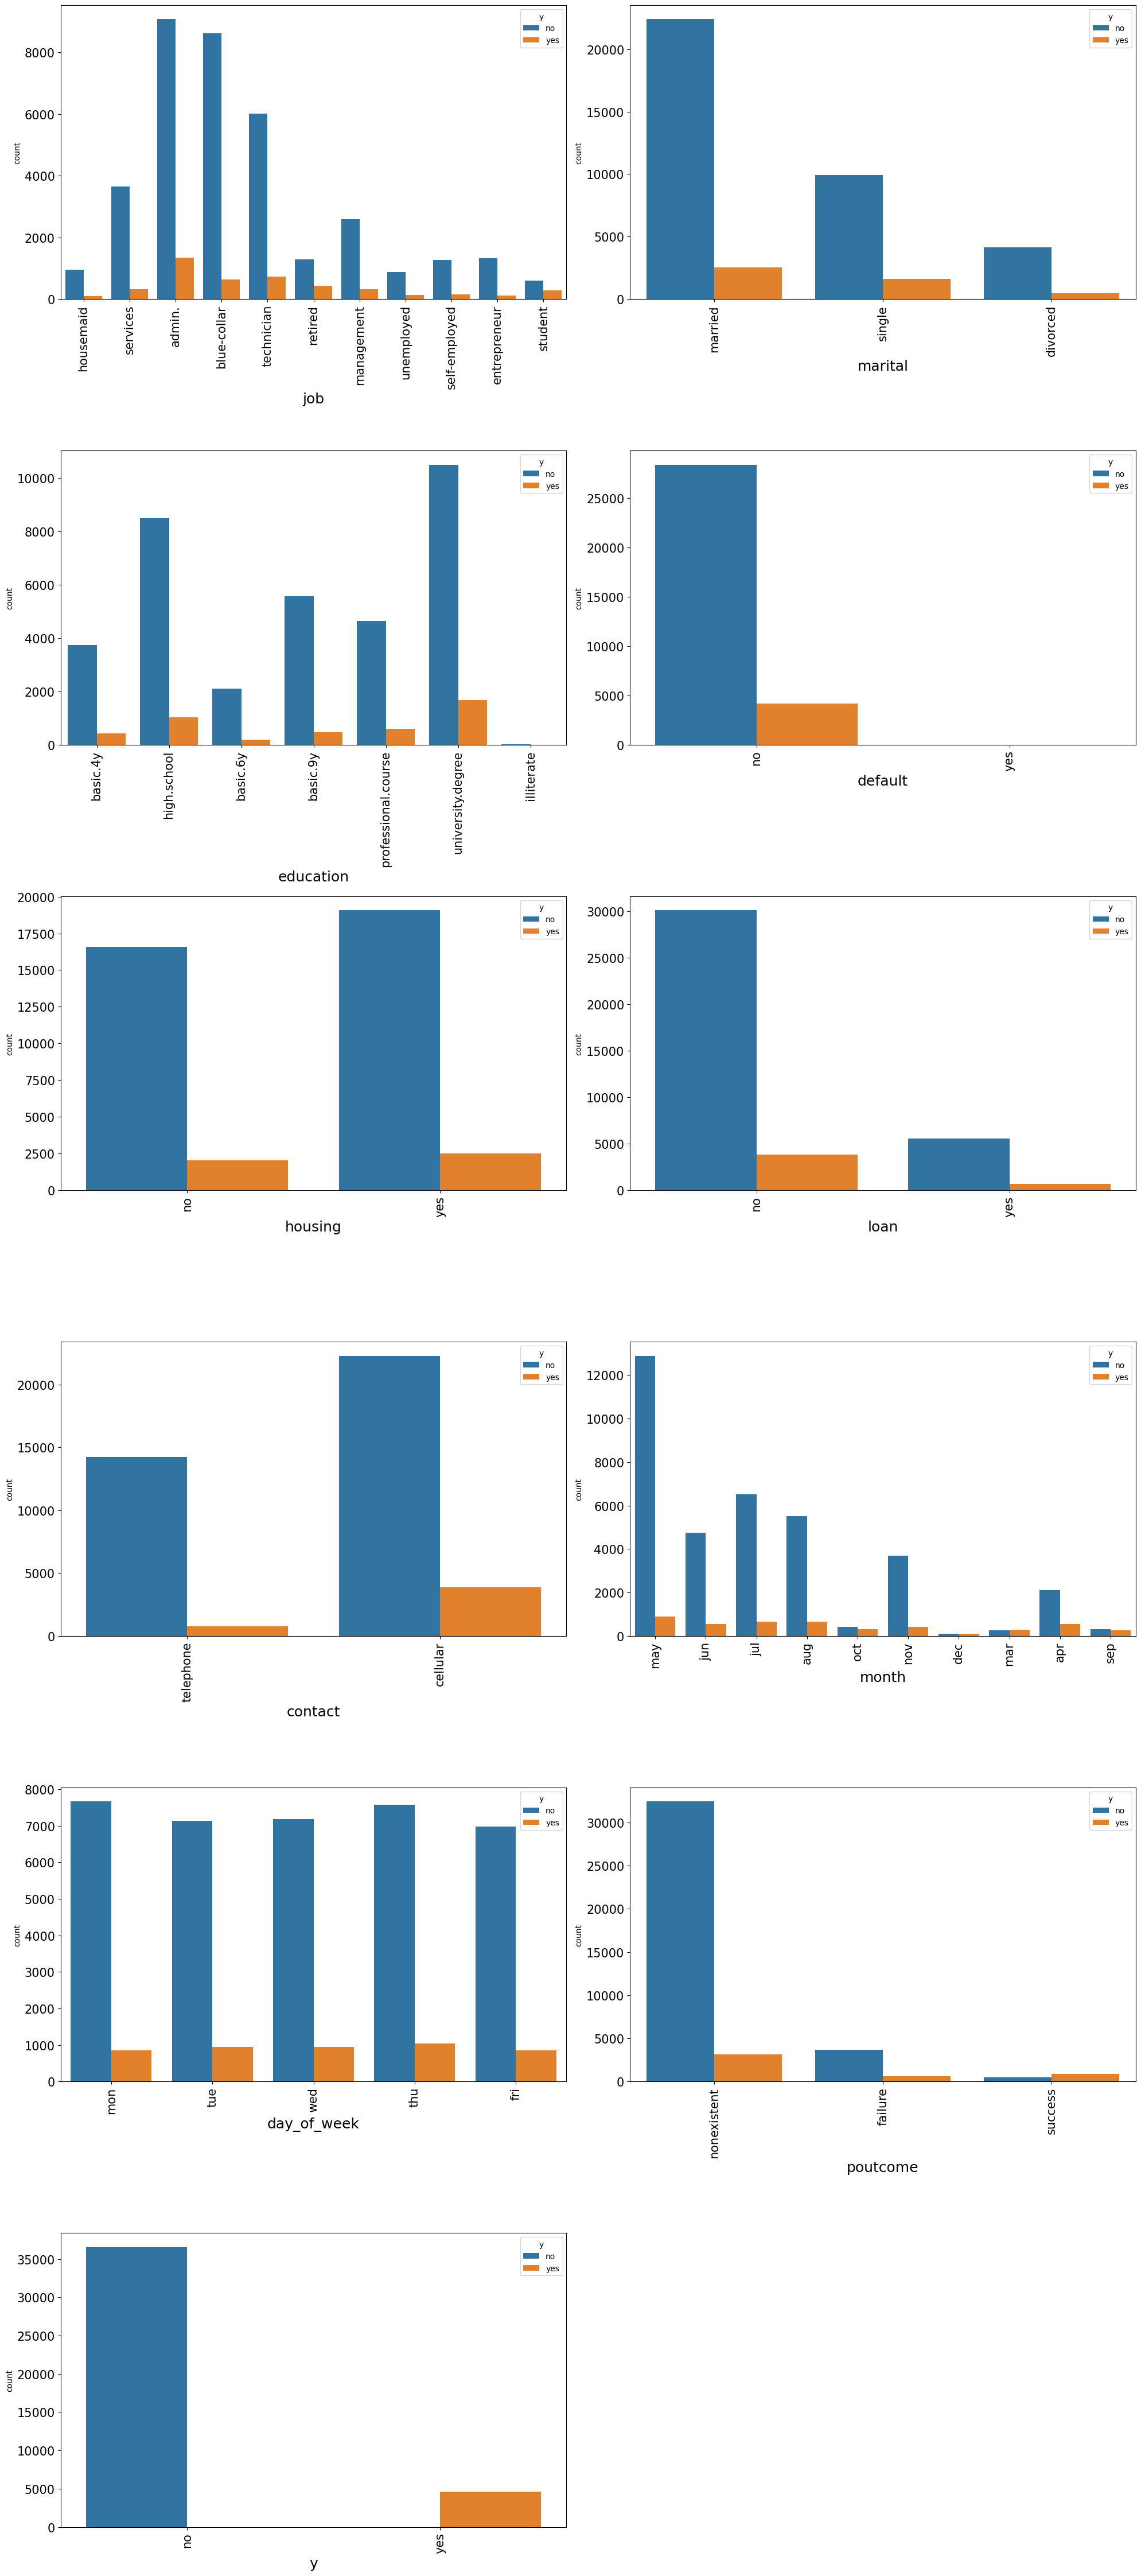

In [36]:
categorical_columns = []

# extract categorical (object dtype) col from dataset for ploting graph
for column in bank_data.columns:
    if bank_data[column].dtype == 'object':
        categorical_columns.append(column)

# Display the list of categorical columns
print("Categorical Columns I used to plot it:", categorical_columns)

plotnumber = 1
plt.figure(figsize=(20, 45), facecolor='white')
for column in categorical_columns:
    if plotnumber <= 12:
        ax = plt.subplot(6, 2, plotnumber)

        sns.countplot(x=column, hue='y', data=bank_data)

        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
        plt.xlabel(column, fontsize=18, fontdict=None)
        ax.tick_params(labelsize=15)

    plotnumber += 1
plt.tight_layout()
plt.show()

### Insights about categorical graph which is I have plotted in above cell.

### insight

#### Job vs target variable(y)
   - Those client who have chance of subscribe a term deposite that is admin, blue-collar,service, retired , management also student. except all these employee another client have less chance.
----------------------------------------------------------------
#### marital vs target variable(y)
   - married client have more chance of subscribed a term deposite as compare to all.
----------------------
#### education vs target variable(y)
   - university.degree client have more chance of subscribed a term deposite as compare to all.
-----------------------------
#### default vs target variable(y)
   - this is represent the client has default credit card or not. and which client has no default credit card his chance of subscribed a term deposite is more.
--------------------------
#### housing vs target variable(y)
   - it's represent client have housing loan or not, and which client have housing loan the chance of subscribed a term deposit is more.
--------------------------------------
#### contact vs target variable(y)
   - the client who is contact from cellular their chance of subscribed a term deposit is more.
--------------------------------------------------
#### month vs target variable(y)
   - the client who is contact in month of may, jun , jul, aug, oct, mar, apr , sep their chance of subscribed a term deposit is more. but i think who is contact in month of mar, sep, and oct their chance is higher to subscribed a term deposite.
-------------------------------------------
#### day of week vs target variable(y)
   - allmost all client have equal chance of to subscribed a term deposite who is contact any days of week. 
-------------------------------------------------------------------
#### poutcome vs target variable(y)
   - those client who have nonexistance outcome of the previous marketing campaign their chance of subscribed a term deposite is more also client who is sucess in the previous marketing campaign thier chance is more than other to subscribed a term deposite.
 -----------------------------------
#### target variable(y)
   - more client who is not subscribed a term deposite.

## 2- We will do bivarient analysis all Numerical column vs target variable.

Numerical Columns I used to plot it: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


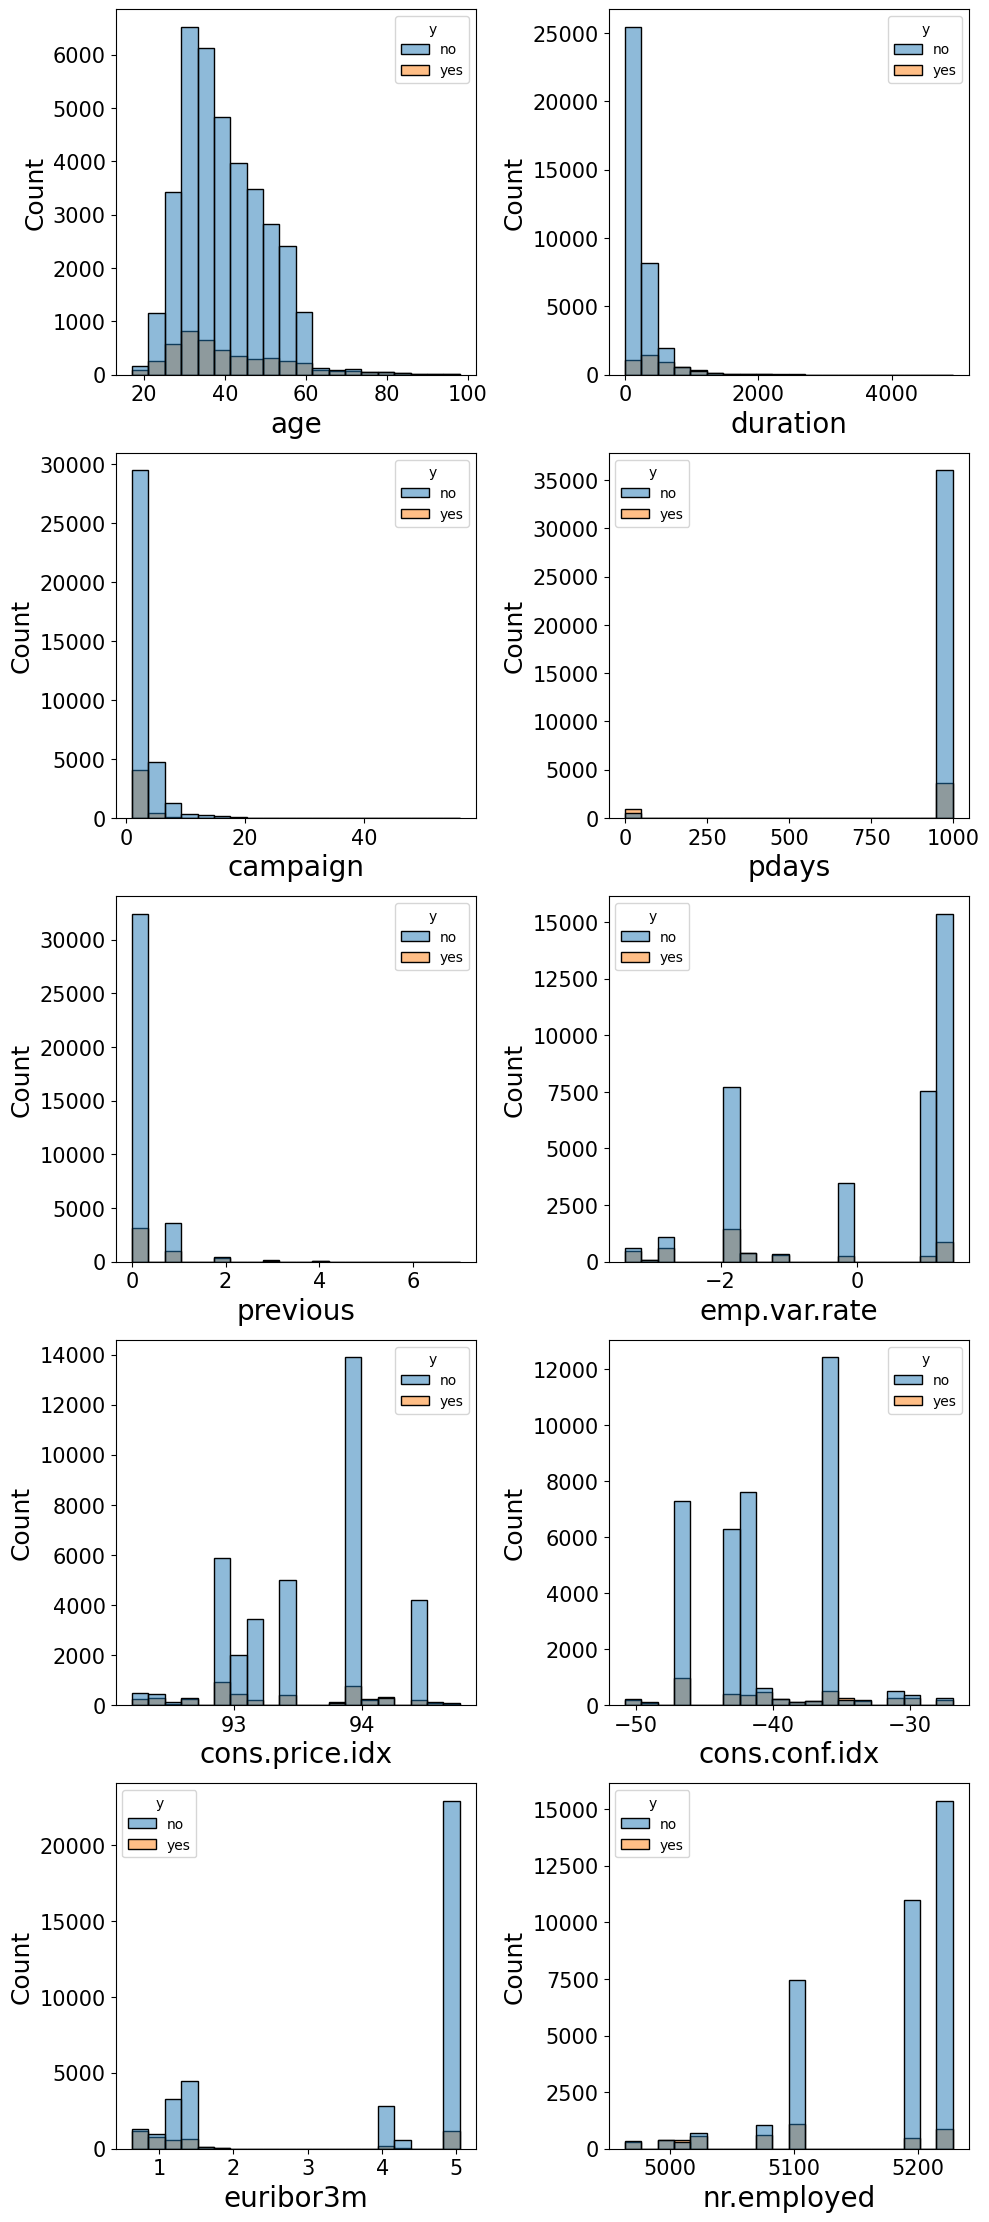

In [37]:
numerical_columns = [] # 

# Identify numerical columns (int64 and float64)
for column in bank_data.columns:
    if bank_data[column].dtype in ['int64', 'float64']:
        numerical_columns.append(column)

# Display the list of numerical columns
print("Numerical Columns I used to plot it:", numerical_columns)

plt.figure(figsize=(10, 35), facecolor='white')

plotnumber = 1

for column in numerical_columns:
    if plotnumber <= 16:
        ax = plt.subplot(8, 2, plotnumber)
        sns.histplot(data=bank_data, x=column, hue='y', bins=20, element='bars');
        plt.xlabel(column, fontsize=20)
        plt.ylabel("Count", fontsize=18)  # Use ylabel instead of a second xlabel for the y-axis label
        ax.tick_params(labelsize=15)
    plotnumber += 1

plt.tight_layout()
plt.show()  # Show the plot


### Insights about numerical graph which is I have plotted in above cell.

#### Insight

#### age vs target variable(y)
    - the client has more chance of subscribed a term deposit which age is 25 to 40
-----------------------------
#### duration vs target variable(y)
    - the client has more chance of subscribed a term deposit which duration is from 0 to 900.
--------------------------------
#### campaign vs target variable(y)
    - 0 to 5 number of contact performed during the campaign has chance of subscribed a term deposit.
------------------------------------
#### pdays vs target variable(y)
    - number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)
    - which client has chance of subscribed a term deposit who is not previously contacted.
------------------------------------------------
#### previous vs target variable(y)
    -number of contacts performed before this campaign and for this client (numeric)
    - this is represent before the campaign how many number of contact performed for client.
    - which client who is contacted 0 to 1 day before the campaign has chance of subscribed a term deposit.

----------------------------------------
#### cons.price.idx vs target variable(y)
    - consumer price index - monthly indicator (numeric)
    - represent monthly price index of client .
    - client cons.price.idx 93 to 94 has chance of subscribed a term deposit.
---------------------------------------------
#### cons.conf.idx vs target variable(y)
    - consumer confidence index - monthly indicator (numeric)
    - cons.conf.idx have chance of subscribed a term deposit from -40 to -48.
-------------------------------------
#### euribor3m vs target variable(y)
    - Here chance of daily subscribed a term deposit from client sometime 1 and 2 or 4 ,5
-----------------------------------------
#### nr.employed vs target variable(y)
    - Here chance of subscribed a term deposit in every quarter.
----------------------------------------

## <span style="font-size: 27px; background-color: #6495ed; padding: 10px;">Data Preprocessing</span>
   - A real-world data generally contains noises, missing values, and maybe in an unusable format which cannot be directly used for machine learning models. Data preprocessing is required tasks for cleaning the data and making it suitable for a machine learning model which also increases the accuracy and efficiency of a machine learning model.
   
---------------------------------------------------------------------
   - When creating a machine learning project, it is not always a case that we come across the clean and formatted data. And while doing any operation with data, it is mandatory to clean it and put in a formatted way. So for this, we use data preprocessing task.
   
----------------------------------------------------------------------
- we will do some process in Data preprocessing.
 - check corrupted value if there is present then i will replace by 0.
 - Check duplicate rows If there is a duplicate, we will drop it.
 - check missing value if there is missing value, we will imput missing value by using mean,median, mode or KNN imputation.
 - check outliers, if outlier detect in features then we will handle outlier by using IQR (Interquartile Range) Method.
 - if feature is in categorical form (yes or no) then i will convert in numerical form (0 and 1) etc.
 - we will check the data is normalize or not if not normalize then i use Min-Max Scaller for normalization.

### Missing values
 - we will check missing value if data has missing then we will handle it.

In [38]:
# checking missing value
bank_data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

- Here we can see that many  column has missing value like- job, marital, education, default, housing, loan.

##### Handling missing values

**job**

In [39]:
bank_data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

In [40]:
len(bank_data.loc[bank_data['job'].isnull()==True])

330

In [41]:
bank_data.loc[bank_data['job'].isnull()==True,'job']='admin.'

**marital**

In [42]:
bank_data.marital.value_counts()

married     24928
single      11568
divorced     4612
Name: marital, dtype: int64

In [43]:
len(bank_data.loc[bank_data['marital'].isnull()==True])

80

In [44]:
bank_data.loc[bank_data['marital'].isnull()==True,'marital']='married'

**education**

In [45]:
bank_data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [46]:
len(bank_data.loc[bank_data['education'].isnull()==True])

1731

In [47]:
bank_data.loc[bank_data['education'].isnull()==True,'education']='university.degree'

**default**

In [48]:
bank_data.default.value_counts()

no     32588
yes        3
Name: default, dtype: int64

In [49]:
len(bank_data.loc[bank_data['default'].isnull()==True])
bank_data.loc[bank_data['default'].isnull()==True,'default']='no'

**housing**

In [50]:
bank_data.housing.value_counts()

yes    21576
no     18622
Name: housing, dtype: int64

In [51]:
len(bank_data.loc[bank_data['housing'].isnull()==True])
bank_data.loc[bank_data['housing'].isnull()==True,'housing']='yes'

**loan**

In [52]:
bank_data.loan.value_counts()

no     33950
yes     6248
Name: loan, dtype: int64

In [53]:
len(bank_data.loc[bank_data['loan'].isnull()==True])
bank_data.loc[bank_data['loan'].isnull()==True,'loan']='no'

In [54]:
bank_data.shape

(41188, 21)

In [55]:
# checking missing value after imputing
bank_data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

now we can see data has no missing(nan) value

### Duplicates
 - we will check duplicate rows if avilable then we will drop it.

In [56]:
duplicate_row=bank_data[bank_data.duplicated()]
len(duplicate_row)

14

- Here we can see that data has 12 duplicated value so we will drop it.

##### Droping duplicate rows

In [57]:
bank_data = bank_data.drop(duplicate_row.index)
bank_data.shape

(41174, 21)

 - duplicated rows removed .

### Checking outliers
 - if outliers is will show in any feature column then we will remove it.
 - we will perform outliers on numerical data only.

In [58]:
numerical_columns

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

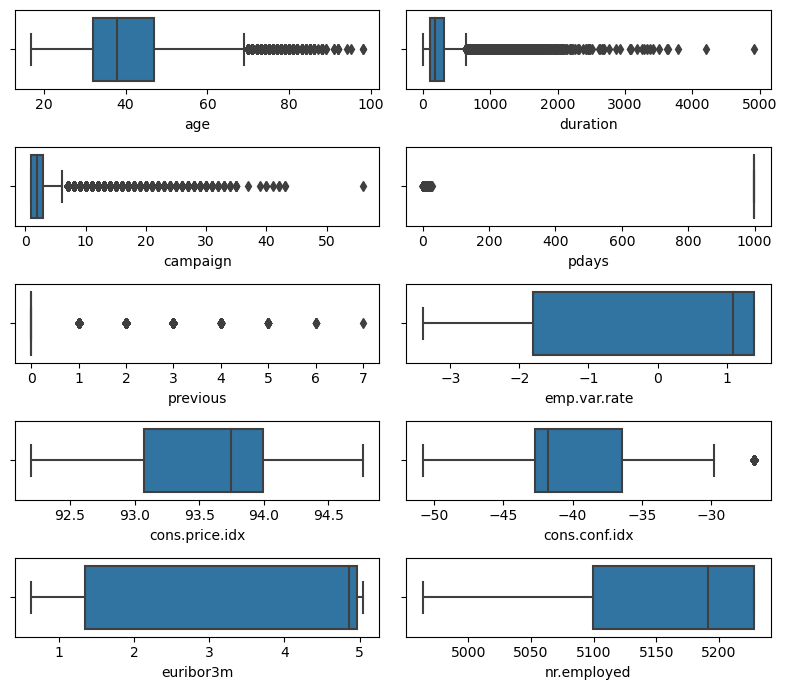

In [59]:
plt.figure(figsize=(8,7), facecolor='white')
plotnum = 1

for col in numerical_columns:
    if plotnum <=10:
        ax = plt.subplot(5,2, plotnum)
        sns.boxplot(x=col,data=bank_data)  # Assuming 'data' is your DataFrame
        plt.xlabel(col, fontsize=10)
    plotnum += 1

plt.tight_layout()
plt.show()

### Removing outliers
 - we will remove outliers one-by-one using IQR method 

#### age

<Axes: >

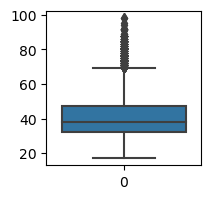

In [60]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data.age)

In [61]:
# importing library allows to access the statistical functions
from scipy import stats

In [62]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data.age,interpolation='midpoint')
IQR

15.0

In [63]:
Q1       = bank_data.age.quantile(0.25) # define 25% of data
Q3       = bank_data.age.quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [64]:
print(min_limit, max_limit)

9.5 69.5


In [65]:
# Filter rows where 'age' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['age']<min_limit])

0

In [66]:
# Filter rows where 'age' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['age']>max_limit])

468

In [67]:
# Replace values in 'age' column that are above 'max_limit' with the median
bank_data.loc[bank_data['age']>max_limit,'age']=np.median(bank_data.age)

In [68]:
len(bank_data.loc[bank_data['age']>max_limit])

0

- outliers removed from age column

#### duration

<Axes: >

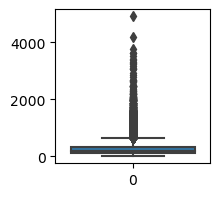

In [69]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data.duration)

In [70]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data.duration,interpolation='midpoint')
IQR

217.0

In [71]:
Q1       = bank_data.duration.quantile(0.25) # define 25% of data
Q3       = bank_data.duration.quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [72]:
print(min_limit, max_limit)

-223.5 644.5


In [73]:
# Filter rows where 'duration' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['duration']<min_limit])

0

In [74]:
# Filter rows where 'duration' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['duration']>max_limit])

2963

In [75]:
# Replace values in 'duration' column that are above 'max_limit' with the median
bank_data.loc[bank_data['duration']>max_limit,'duration']=np.median(bank_data.duration)

In [76]:
len(bank_data.loc[bank_data['duration']>max_limit])

0

- outliers removed from 'duration column

#### campaign

<Axes: >

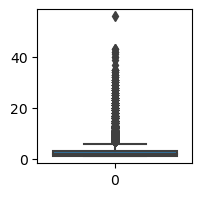

In [77]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data.campaign)

In [78]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data.campaign,interpolation='midpoint')
IQR

2.0

In [79]:
Q1       = bank_data.campaign.quantile(0.25) # define 25% of data
Q3       = bank_data.campaign.quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [80]:
print(min_limit, max_limit)

-2.0 6.0


In [81]:
# Filter rows where 'campaign' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['campaign']<min_limit])

0

In [82]:
# Filter rows where 'campaign' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['campaign']>max_limit])

2406

In [83]:
# Replace values in 'campaign' column that are above 'max_limit' with the median
bank_data.loc[bank_data['campaign']>max_limit,'campaign']=np.median(bank_data.campaign)

In [84]:
len(bank_data.loc[bank_data['campaign']>max_limit])

0

- outliers removed from 'campaign' column

#### pdays

<Axes: >

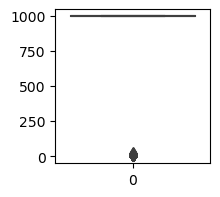

In [85]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data.pdays)

In [86]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data.pdays,interpolation='midpoint')
IQR

0.0

In [87]:
Q1       = bank_data.pdays.quantile(0.25) # define 25% of data
Q3       = bank_data.pdays.quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [88]:
print(min_limit, max_limit)

999.0 999.0


In [89]:
# Filter rows where 'pdays' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['pdays']<min_limit])

1515

In [90]:
bank_data.loc[bank_data['pdays']<min_limit,'pdays']=np.median(bank_data.pdays)

In [91]:
len(bank_data.loc[bank_data['pdays']<min_limit])

0

In [92]:
# Filter rows where 'pdays' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['pdays']>max_limit])

0

In [93]:
bank_data.pdays.value_counts()

999    41174
Name: pdays, dtype: int64

- outliers removed from 'pdays' column

#### previous

In [94]:
bank_data.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [95]:
bank_data.previous.value_counts()

0    35549
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

<Axes: >

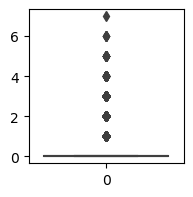

In [96]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data.previous)

In [97]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data.previous,interpolation='midpoint')
IQR

0.0

In [98]:
Q1       = bank_data.previous.quantile(0.25) # define 25% of data
Q3       = bank_data.previous.quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [99]:
print(min_limit, max_limit)

0.0 0.0


In [100]:
# Filter rows where 'previous' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['previous']<min_limit])

0

In [101]:
# Filter rows where 'previous' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['previous']>max_limit])

5625

In [102]:
# Replace values in 'previous' column that are above 'max_limit' with the median
bank_data.loc[bank_data['previous']>max_limit,'previous']=np.median(bank_data.previous)

In [103]:
len(bank_data.loc[bank_data['previous']>max_limit])

0

- outliers removed from 'previous' column.

#### cons.conf.idx

<Axes: >

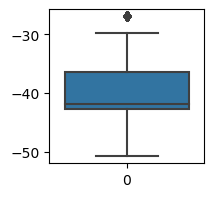

In [104]:
plt.figure(figsize=(2,2))
sns.boxplot(bank_data['cons.conf.idx'])

In [105]:
# Calculate the Interquartile Range (IQR) for 'resting_blood_pressure' column
# The 'interpolation='midpoint'' argument specifies the method to compute the IQR.
IQR= stats.iqr(bank_data['cons.conf.idx'],interpolation='midpoint')
IQR

6.300000000000004

In [106]:
Q1       = bank_data['cons.conf.idx'].quantile(0.25) # define 25% of data
Q3       = bank_data['cons.conf.idx'].quantile(0.75) # define 75% of data
min_limit=Q1 - 1.5*IQR # Formula for getting lower limit
max_limit=Q3 + 1.5*IQR # formula for getting upper limit

In [107]:
print(min_limit, max_limit)

-52.150000000000006 -26.949999999999992


In [108]:
# Filter rows where 'cons.conf.idx' values are below the calculated 'min_limit'
len(bank_data.loc[bank_data['cons.conf.idx']<min_limit])

0

In [109]:
# Filter rows where 'cons.conf.idx' values are above the calculated 'max_limit'
len(bank_data.loc[bank_data['cons.conf.idx']>max_limit])

446

In [110]:
# Replace values in 'cons.conf.idx' column that are above 'max_limit' with the median
bank_data.loc[bank_data['cons.conf.idx']>max_limit,'cons.conf.idx']=np.median(bank_data['cons.conf.idx'])

In [111]:
len(bank_data.loc[bank_data['cons.conf.idx']>max_limit])

0

 - outliers removed from 'cons.conf.idx' column.

### Data conversion
 - we will convert categorical feature into numeric by using map function and we will do manually encoded

In [112]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41174 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41174 non-null  int64  
 1   job             41174 non-null  object 
 2   marital         41174 non-null  object 
 3   education       41174 non-null  object 
 4   default         41174 non-null  object 
 5   housing         41174 non-null  object 
 6   loan            41174 non-null  object 
 7   contact         41174 non-null  object 
 8   month           41174 non-null  object 
 9   day_of_week     41174 non-null  object 
 10  duration        41174 non-null  int64  
 11  campaign        41174 non-null  int64  
 12  pdays           41174 non-null  int64  
 13  previous        41174 non-null  int64  
 14  poutcome        41174 non-null  object 
 15  emp.var.rate    41174 non-null  float64
 16  cons.price.idx  41174 non-null  float64
 17  cons.conf.idx   41174 non-null 

 **first we will check value_counts() of every object columns according to value_counts() we will manually assign some value of every features**

In [113]:
dict(bank_data.job.value_counts())

{'admin.': 10748,
 'blue-collar': 9252,
 'technician': 6739,
 'services': 3967,
 'management': 2924,
 'retired': 1718,
 'entrepreneur': 1456,
 'self-employed': 1421,
 'housemaid': 1060,
 'unemployed': 1014,
 'student': 875}

In [114]:
dict(bank_data.marital.value_counts())

{'married': 24999, 'single': 11564, 'divorced': 4611}

In [115]:
dict(bank_data.education.value_counts())

{'university.degree': 13893,
 'high.school': 9512,
 'basic.9y': 6045,
 'professional.course': 5240,
 'basic.4y': 4175,
 'basic.6y': 2291,
 'illiterate': 18}

In [116]:
dict(bank_data.default.value_counts())

{'no': 41171, 'yes': 3}

In [117]:
dict(bank_data.housing.value_counts())

{'yes': 22560, 'no': 18614}

In [118]:
dict(bank_data.loan.value_counts())

{'no': 34926, 'yes': 6248}

In [119]:
dict(bank_data.contact.value_counts())

{'cellular': 26134, 'telephone': 15040}

In [120]:
dict(bank_data.month.value_counts())

{'may': 13766,
 'jul': 7169,
 'aug': 6175,
 'jun': 5318,
 'nov': 4100,
 'apr': 2631,
 'oct': 717,
 'sep': 570,
 'mar': 546,
 'dec': 182}

In [121]:
dict(bank_data.day_of_week.value_counts())

{'thu': 8617, 'mon': 8511, 'wed': 8134, 'tue': 8086, 'fri': 7826}

In [122]:
dict(bank_data.poutcome.value_counts())

{'nonexistent': 35549, 'failure': 4252, 'success': 1373}

In [123]:
dict(bank_data.y.value_counts())

{'no': 36535, 'yes': 4639}

In [124]:
bank_data.job = bank_data.job.map({'admin.': 10,'blue-collar': 9,'technician': 8,'services': 7,'management': 6,'retired': 5,'entrepreneur': 4,'self-employed': 3,'housemaid': 2,'unemployed': 0,'student': 1 })
bank_data.marital = bank_data.marital.map({'married': 1, 'single': 0, 'divorced': 2})
bank_data.education = bank_data.education.map({'university.degree': 6,'high.school': 5,'basic.9y': 4,'professional.course': 3,'basic.4y': 2,'basic.6y': 1,'illiterate': 0})
bank_data.default = bank_data.default.map({'no': 0, 'yes': 1})
bank_data.housing = bank_data.housing.map({'yes': 1, 'no': 0})
bank_data.loan = bank_data.loan.map({'no': 0, 'yes': 1})
bank_data.contact = bank_data.contact.map({'cellular': 0, 'telephone': 1})
bank_data.month = bank_data.month.map({'may': 5,'jul': 7,'aug': 8,'jun': 6,'nov': 11,'apr': 4,'oct': 10,'sep': 9,'mar': 3,'dec': 12})
bank_data.day_of_week = bank_data.day_of_week.map({'thu': 5, 'mon': 1, 'wed': 4, 'tue': 2, 'fri': 6})
bank_data.poutcome = bank_data.poutcome.map({'nonexistent': 2, 'failure': 0, 'success': 1})
bank_data.y = bank_data.y.map({'no': 0, 'yes': 1})

In [125]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,1,2,0,0,0,1,5,1,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,5,0,0,0,1,5,1,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,5,0,1,0,1,5,1,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,10,1,1,0,0,0,1,5,1,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,5,0,0,1,1,5,1,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


#### checking normalization
 - we will check data distribution wheather data is distributed normal or not ,is data standard or not, is it right skew or left skew 

In [126]:
# select numerical col only to perform scaling
num_col= bank_data[['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']]
num_col_df = pd.DataFrame(num_col)

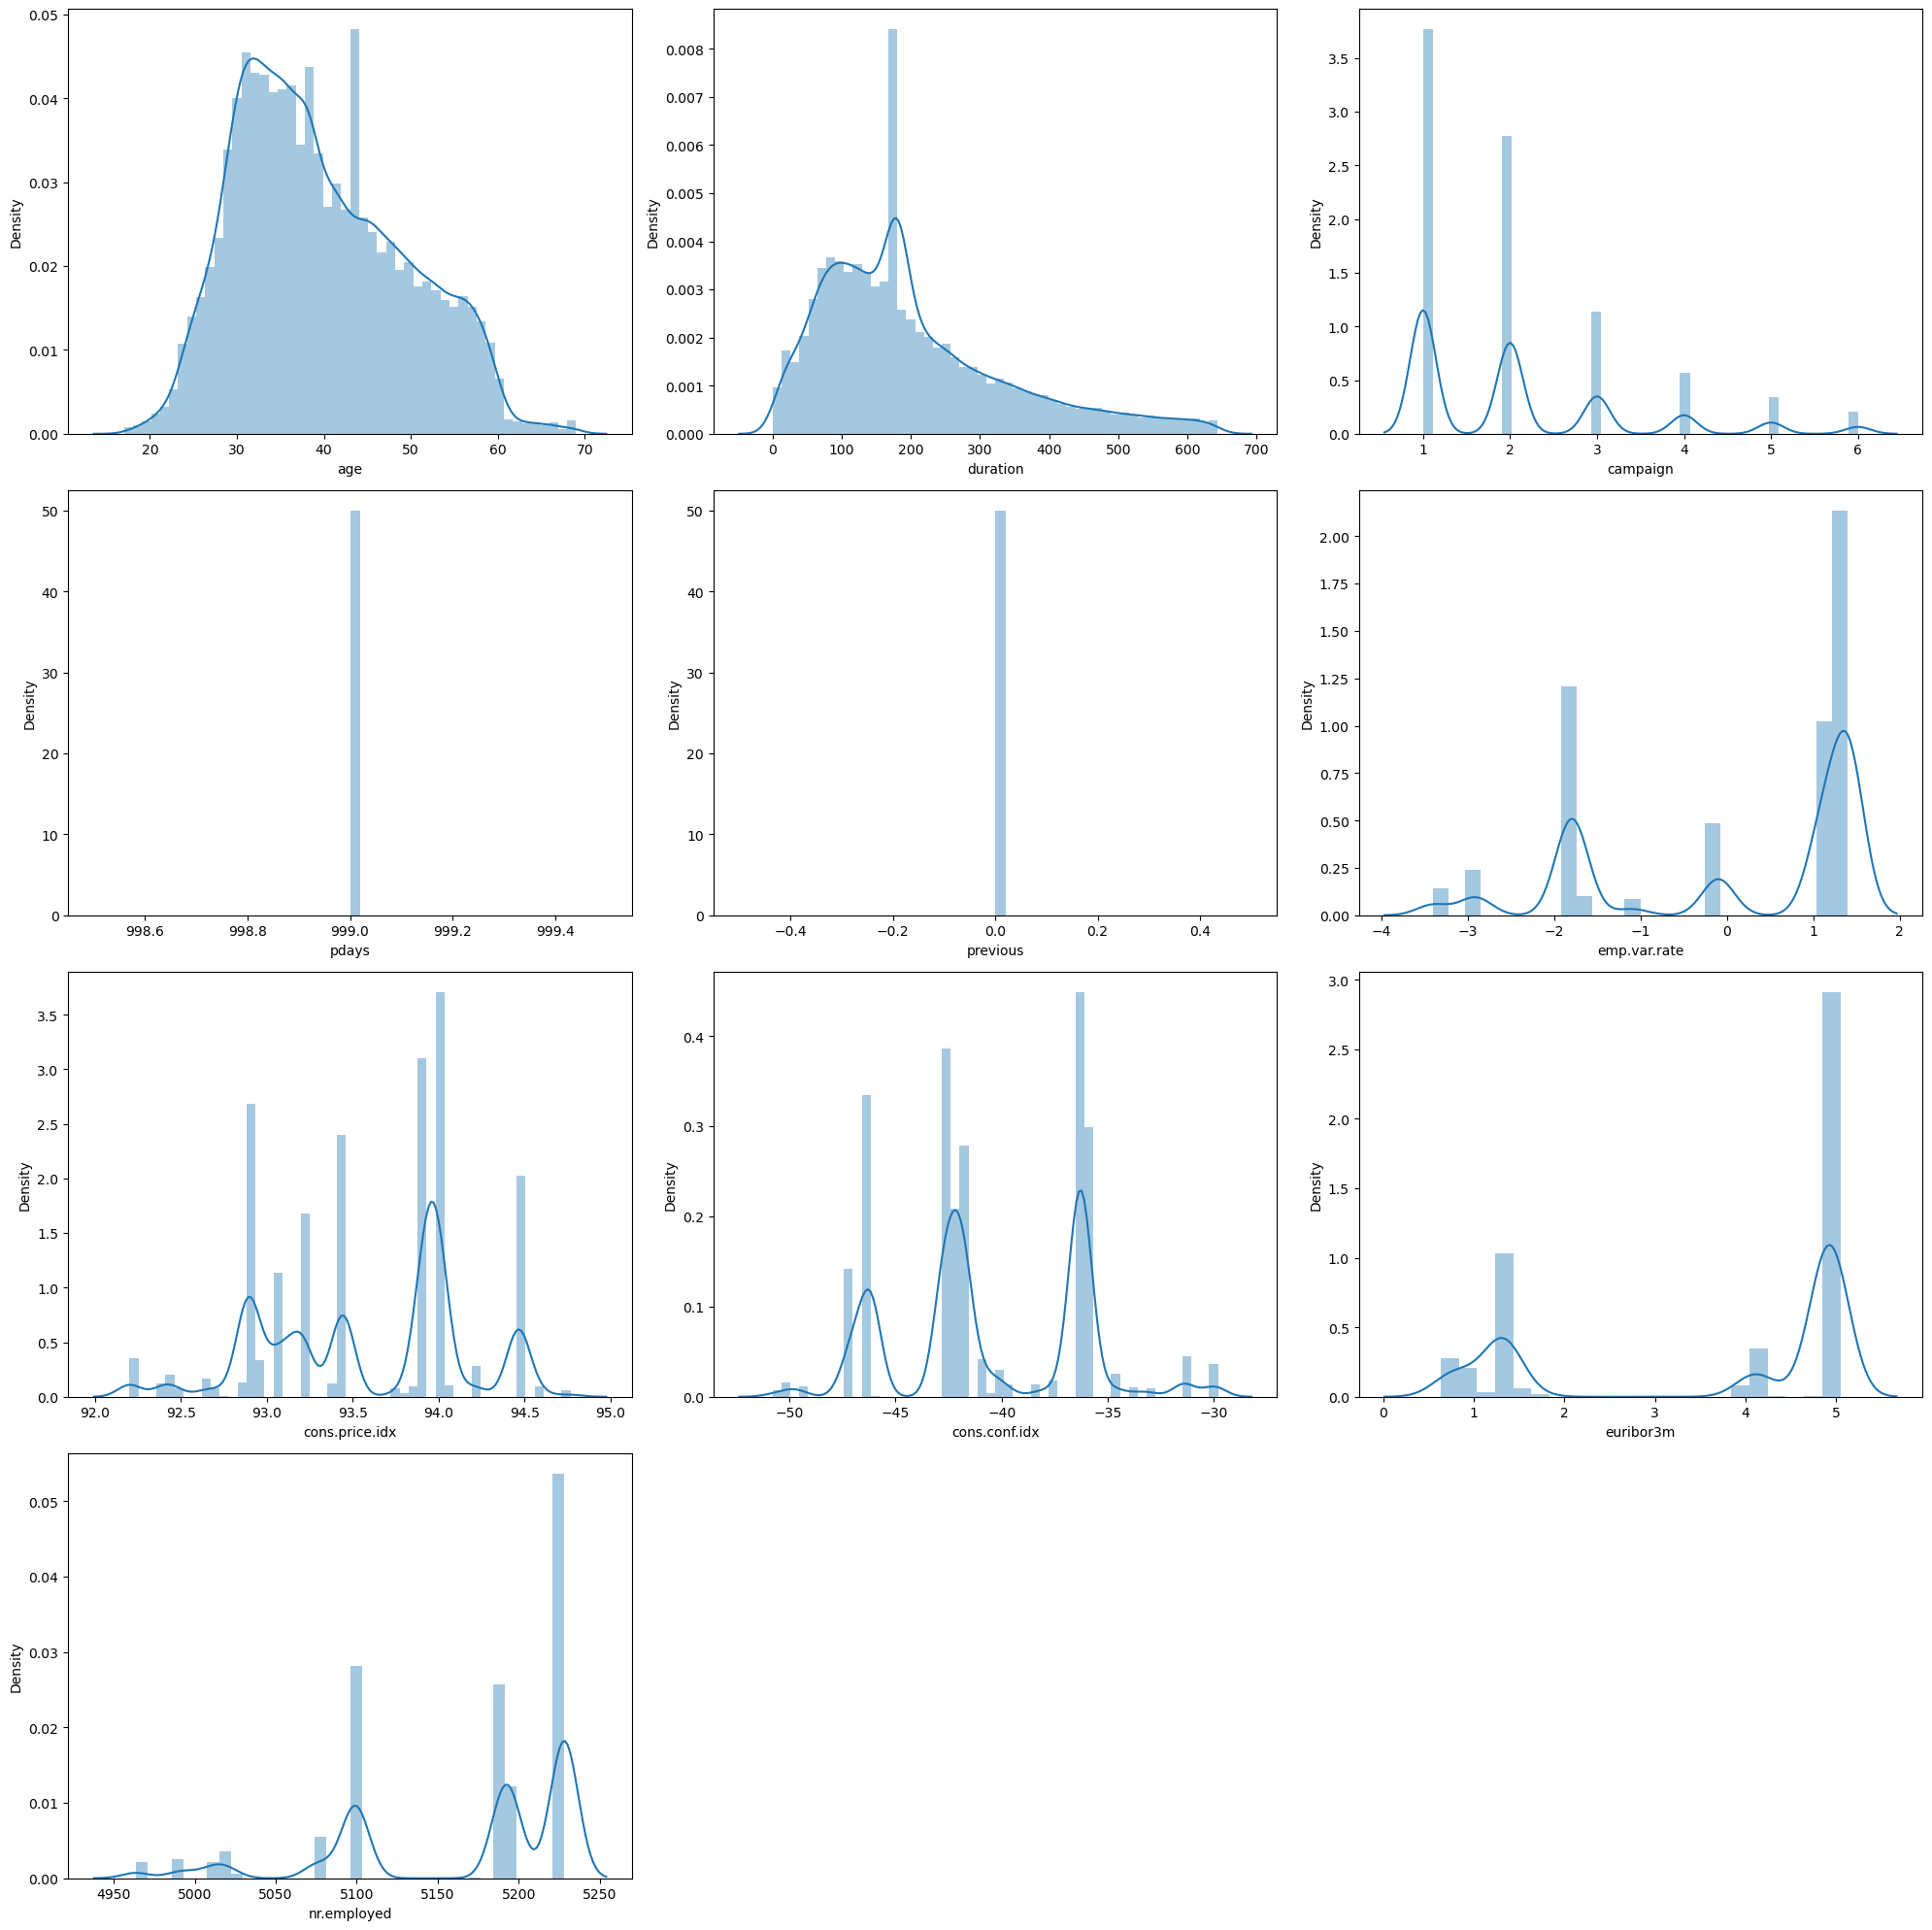

In [127]:
# checking normalization
plt.figure(figsize=(20,20), facecolor='white')
plotnum=1
for col in num_col_df:
    if plotnum<12:
        ax = plt.subplot(4,3,plotnum)
        sns.distplot(num_col_df[col])
        plt.xlabel(col,fontsize=10)
    plotnum+=1
plt.tight_layout()

- here we can see data is almost normalize

In [128]:
# # import Standscaller for scalling data also we can use min-max scaler but i prefred standardscalet
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaled_data = scaler.fit_transform(to_be_normalize)

## <span style="font-size: 27px; background-color: #800000; padding: 10px;">Feature selection</span>

 - checking if data is above 80-90% coorelated then we can drop it otherwise it will not disturb our data set.
 - we will check coorelation of numerical column only not categorical col or target variable.

In [129]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,2,1,2,0,0,0,1,5,1,261,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,5,0,0,0,1,5,1,149,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,5,0,1,0,1,5,1,226,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
3,40,10,1,1,0,0,0,1,5,1,151,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,5,0,0,1,1,5,1,307,1,999,0,2,1.1,93.994,-36.4,4.857,5191.0,0


In [130]:
corr_check = bank_data.iloc[:, [0, 1,2,3,4,5,6,7,8,9,10, 11,14,15,16,17,18,19]]

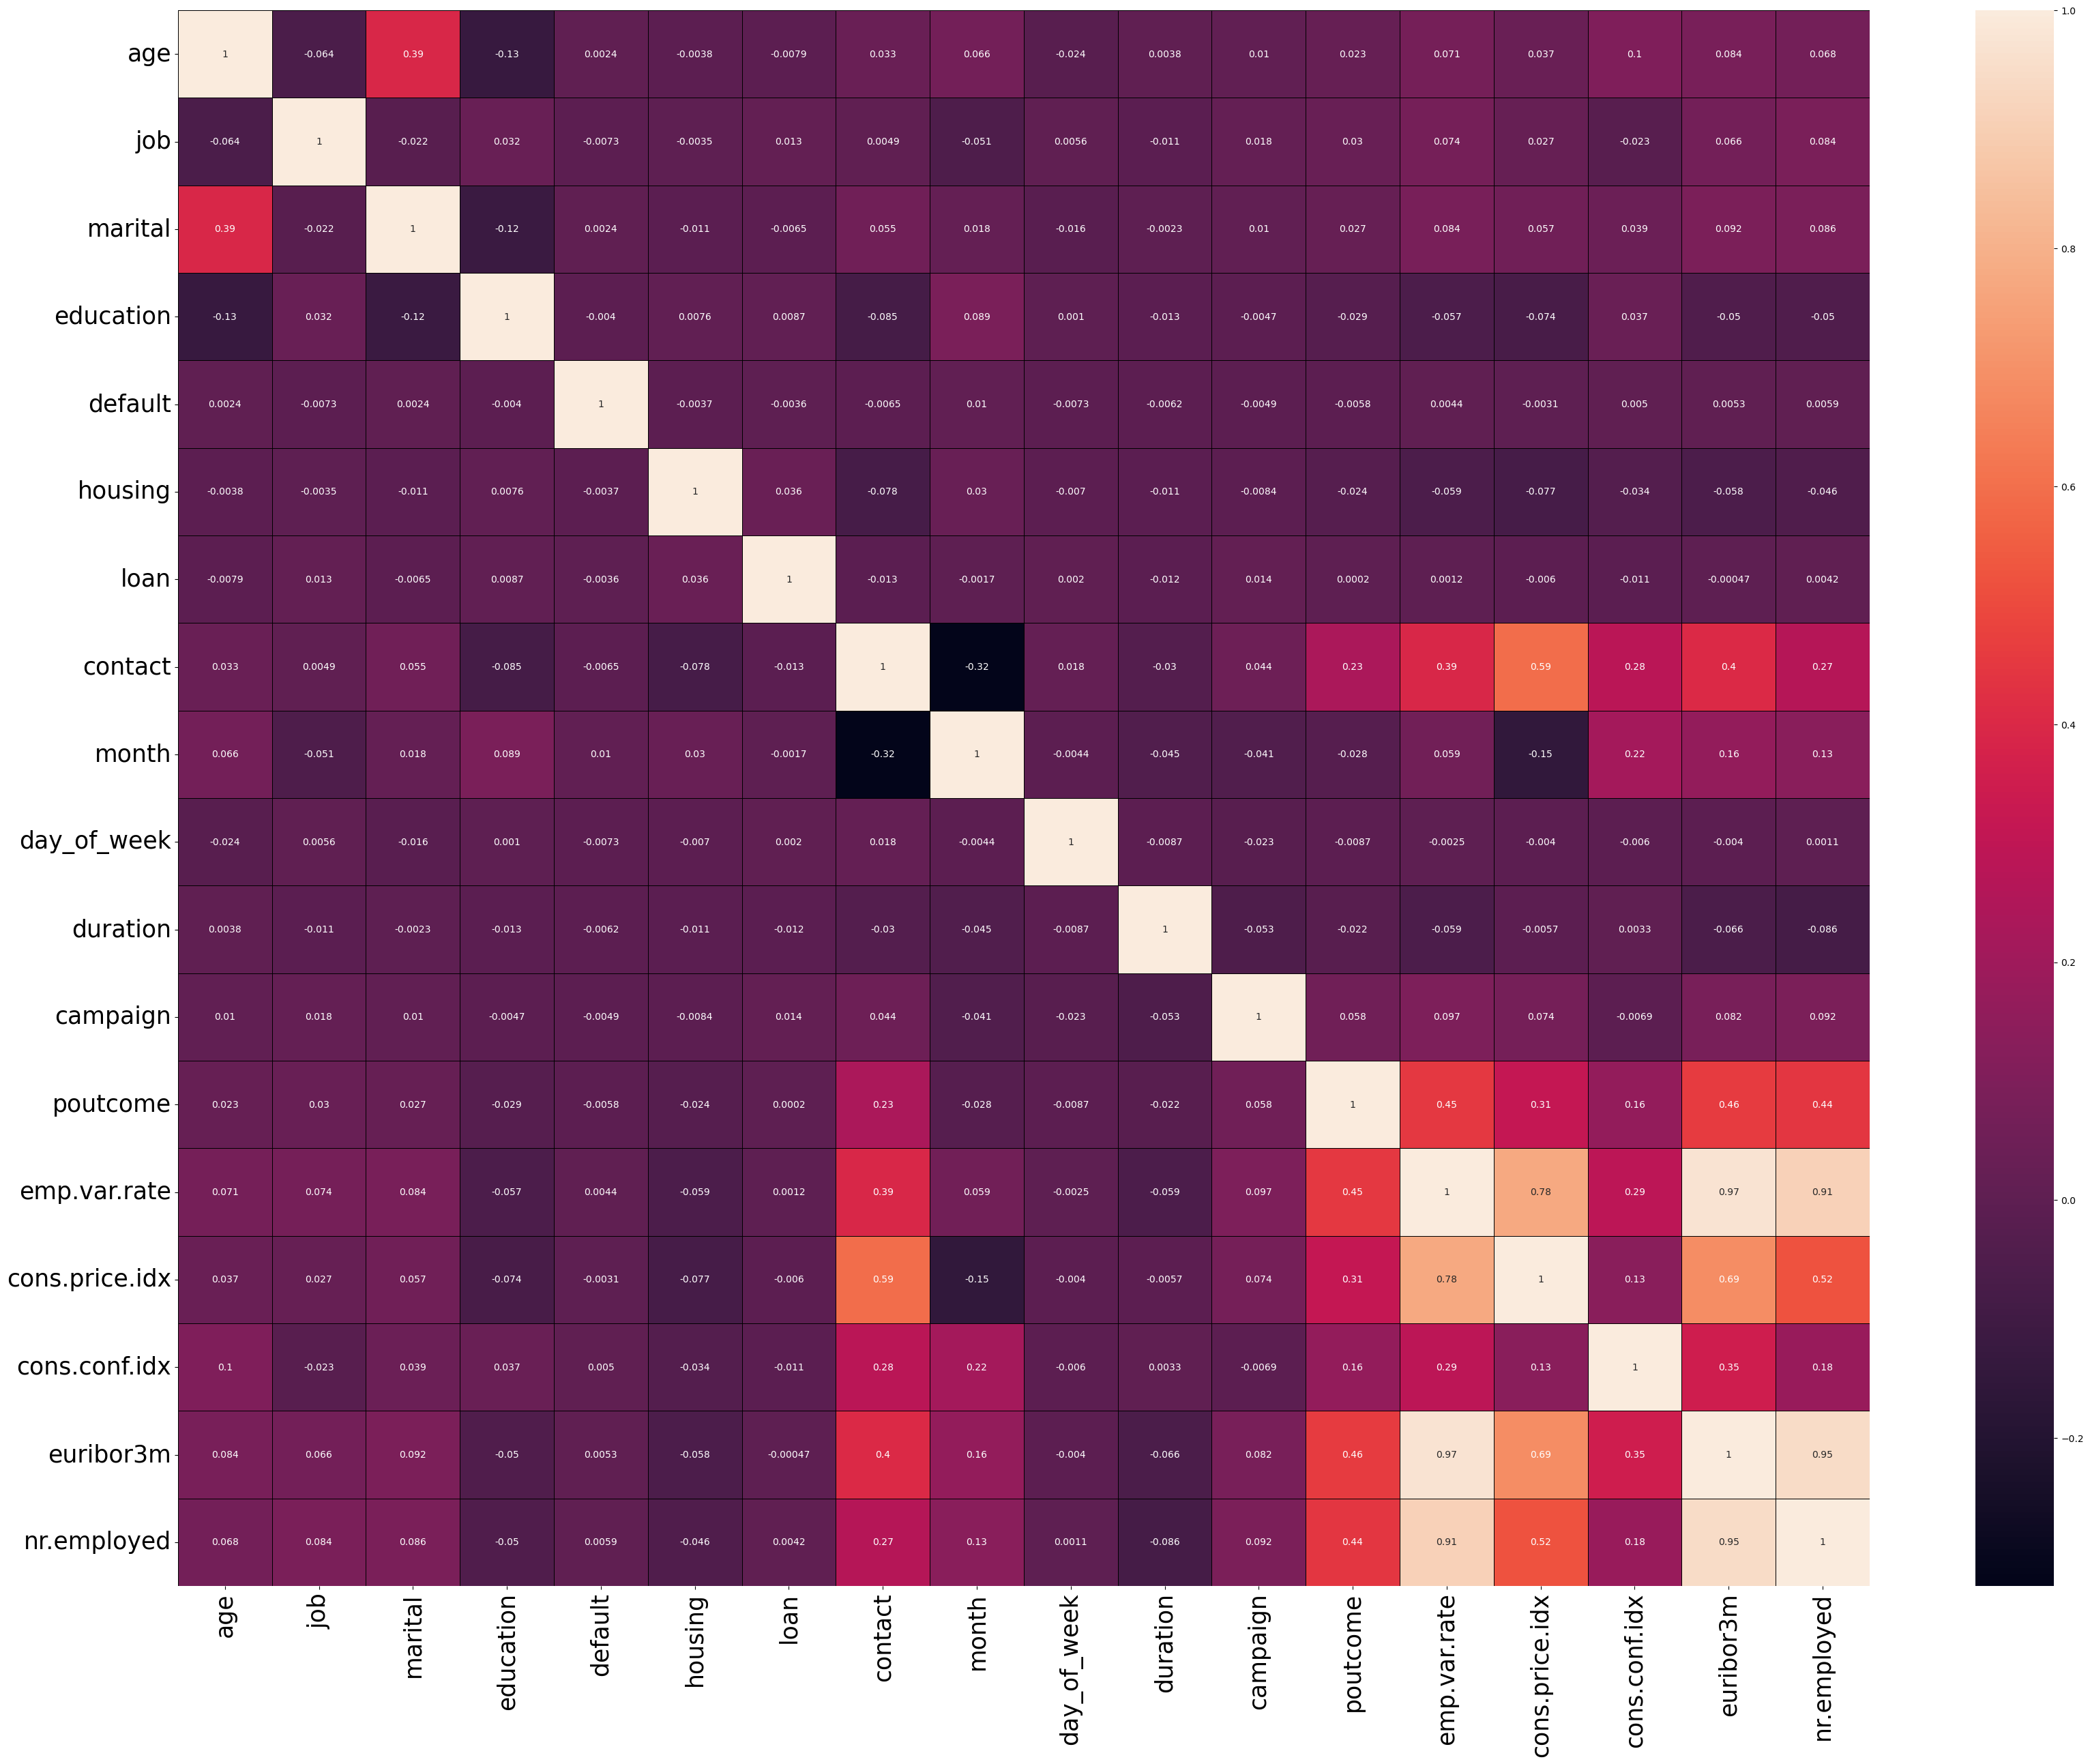

In [131]:
plt.figure(figsize=(40,30))
sns.heatmap(corr_check.corr(),linewidths=0.5,linecolor='black',annot=True, )
plt.xticks(fontsize=25,rotation = 90)
plt.yticks(fontsize=25,rotation = 360)
plt.show()

 - we can see that data is high coorelated 
    - nr.employed vs euribor3m
    - emp.var.rate vs nr.employed
    - euribor3m vs emp.var.rate
 - moderate coorelated
    - emp.var.rate vs cons.price.idx

**highly coorelated data droping**

In [132]:
col_to_drop = ['emp.var.rate','nr.employed','euribor3m']

In [133]:
dropped_col= bank_data.drop(columns=col_to_drop,inplace=True)

In [134]:
bank_data.shape

(41174, 18)

#### Check data balancing
 - this is classification problem so we will check data is balance or not on target variable

In [135]:
bank_data.y.value_counts()

0    36535
1     4639
Name: y, dtype: int64

- here we can see data is not balanced so we will balance the data

## <span style="font-size: 27px; background-color: #afeeee; padding: 10px;">Train test split</span>

  - It divides a dataset into two subsets: one for training (used to build the model) and one for testing (used to evaluate its performance).
  - This helps assess how well the model generalizes to unseen data.
  - Typically, the training set contains a larger portion of the data (e.g., 70-80%), while the testing set is smaller.

In [136]:
# we will seprate the target variable and independent varialbe
X = bank_data.iloc[:,:-1]
y = bank_data.iloc[:,-1]

In [137]:
# Import train test split for traning and testing the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size=0.2, random_state=42)

In [138]:
# shape of traning and testing dataset
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((32939, 17), (32939,), (8235, 17), (8235,))

##### balancing data
  - for balance data use we use SMOTE 

In [139]:
len(y)

41174

In [140]:
y.value_counts()

0    36535
1     4639
Name: y, dtype: int64

In [141]:
total = 41174
value1 = 36535

In [142]:
total = 41174
value1 = 36535
value2 = 4117

percentages = []
for v in [value1,value2]:
    precentage = (v/total)*100
    percentages.append(precentage)
print(f"Percentage of value1 in total----> {percentages[0]}%")
print(f"Percentage of value2 in total----> {percentages[1]}%")

Percentage of value1 in total----> 88.73318113372517%
Percentage of value2 in total----> 9.99902851313936%


In [143]:
# percentage = (Value / Total) * 100
# for first_value = 36535
value = 36535
total = 41174
percentage = (value / total) * 100
print('percentage of first value 0 is--->',percentage,"%")

# for second value
value_2nd = 4639
total2 = 41174
percentage1 = (value_2nd / total2) * 100
print('percentage of second value 1 is--->',percentage1,"%")

percentage of first value 0 is---> 88.73318113372517 %
percentage of second value 1 is---> 11.266818866274834 %


- Here we can see that the percentage of feature 0 is 88.73% which is more than the value of feature 1 that is 11.26% .
- So if minority value is appprox 40 to 50 percente then  we need to balance the data otherwise our data caan be disturbed.

### In case of, if need for balance the target variable we can use SMOTE

In [144]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_smote,y_smote = smote.fit_resample(X_train, y_train)


# from collections import Counter
# print("Actual Classe",Counter(y_train))
# print("SMOTE_Classe",Counter(y_smote))

In [145]:
# y_smote.value_counts()

## <span style="font-size: 27px; background-color: #4997d0; padding: 10px;">Model Selection</span>

 - Model selection is a crucial step when working on machine learning projects that can significantly impact the accuracy and efficiency of the projects.
 - since it is binary class classification problem so we will select diffrent algorithm to check the accuracy and  how this data is performing

In [146]:
# X_train =x_smote
# y_train=y_smote

### 1. LogisticRegression

 - since it is classclassification problem we will use this model.

In [147]:
# creating model
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train,y_train)

LogisticRegression()

In [148]:
lr_pred= lr_clf.predict(X_test)
lr_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
lr_pred1 = lr_clf.predict(X_train)
lr_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### model evaluation

In [150]:
from sklearn.metrics import accuracy_score, f1_score,r2_score,classification_report,confusion_matrix,recall_score, precision_score

In [151]:
lr_cm = confusion_matrix(y_test,lr_pred)
print(lr_cm)

[[7246   35]
 [ 935   19]]


In [152]:
# checking accuracy score
lr_accuracy = accuracy_score(y_test,lr_pred)
lr_accuracy

0.8822100789313904

In [153]:
lr_accuracy1 = accuracy_score(y_train,lr_pred1)
lr_accuracy1

0.8873371990649382

In [154]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7281
           1       0.35      0.02      0.04       954

    accuracy                           0.88      8235
   macro avg       0.62      0.51      0.49      8235
weighted avg       0.82      0.88      0.83      8235



### 2. RandomForestClassifier

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [156]:
rf_pred = rf_clf.predict(X_test)
rf_pred1 = rf_clf.predict(X_train)

##### model evluation

In [157]:
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

[[7052  229]
 [ 499  455]]


In [158]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_accuracy

0.9115968427443837

In [159]:
rf_accuracy1 = accuracy_score(y_train, rf_pred1)
rf_accuracy1

0.9998178451076232

In [160]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7281
           1       0.67      0.48      0.56       954

    accuracy                           0.91      8235
   macro avg       0.80      0.72      0.75      8235
weighted avg       0.90      0.91      0.91      8235



### 3. SVM  Classifier

In [161]:
from sklearn.svm import SVC
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [162]:
svc_pred = svc_clf.predict(X_test)
svc_pred1 = svc_clf.predict(X_train)

##### model evaluation

In [163]:
svc_cm = confusion_matrix(y_test, svc_pred)
print (svc_cm)

[[7281    0]
 [ 954    0]]


In [164]:
svc_accuracy = accuracy_score(y_test, svc_pred)
svc_accuracy

0.8841530054644808

In [165]:
svc_accuracy1 = accuracy_score(y_train, svc_pred1)
svc_accuracy1

0.8881265369319045

In [166]:
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7281
           1       0.00      0.00      0.00       954

    accuracy                           0.88      8235
   macro avg       0.44      0.50      0.47      8235
weighted avg       0.78      0.88      0.83      8235



### 4. Decision tree classifier

In [167]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [168]:
dt_pred = dt_clf.predict(X_test)
dt_pred1 = dt_clf.predict(X_train)

#### model evalution

In [169]:
dt_cm = confusion_matrix(y_test, dt_pred)
dt_cm

array([[6765,  516],
       [ 491,  463]], dtype=int64)

In [170]:
dt_accuracy = accuracy_score(y_test,dt_pred)
dt_accuracy

0.8777170613236187

In [171]:
dt_accuracy1 = accuracy_score(y_train,dt_pred1)
dt_accuracy1

0.9998482042563527

In [172]:
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7281
           1       0.47      0.49      0.48       954

    accuracy                           0.88      8235
   macro avg       0.70      0.71      0.70      8235
weighted avg       0.88      0.88      0.88      8235



### 5. Adabost Classifier 

In [173]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [174]:
ada_pred = ada_clf.predict(X_test)
ada_pred1 = ada_clf.predict(X_train)

##### model evaluation

In [175]:
ada_cm = confusion_matrix(y_test, ada_pred)
ada_cm

array([[7114,  167],
       [ 649,  305]], dtype=int64)

In [176]:
ada_accuracu = accuracy_score(y_test,ada_pred)
ada_accuracu

0.9009107468123861

In [177]:
ada_accuracu1 = accuracy_score(y_train,ada_pred1)
ada_accuracu1

0.9052490968153253

In [178]:
print(classification_report(y_test, ada_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7281
           1       0.65      0.32      0.43       954

    accuracy                           0.90      8235
   macro avg       0.78      0.65      0.69      8235
weighted avg       0.89      0.90      0.89      8235



### 6. GradientDecentClassifier

In [179]:
from sklearn.ensemble import GradientBoostingClassifier
gd_clf = GradientBoostingClassifier()
gd_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [180]:
gd_pred = gd_clf.predict(X_test)
gd_pred1 = gd_clf.predict(X_train)

##### model evaluation

In [181]:
gd_cm = confusion_matrix(y_test, gd_pred)
gd_cm

array([[7127,  154],
       [ 613,  341]], dtype=int64)

In [182]:
gd_accuracy = accuracy_score(y_test,gd_pred)
gd_accuracy

0.9068609593199757

In [183]:
gd_accuracy1 = accuracy_score(y_train,gd_pred1)
gd_accuracy1

0.9128085248489632

In [184]:
print(classification_report(y_test,gd_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7281
           1       0.69      0.36      0.47       954

    accuracy                           0.91      8235
   macro avg       0.80      0.67      0.71      8235
weighted avg       0.89      0.91      0.89      8235



### 7. XGBClassifier

In [185]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [186]:
xgb_pred = xgb_clf.predict(X_test)
xgb_pred1 = xgb_clf.predict(X_train)

##### model evaluation

In [187]:
xgb_cm = confusion_matrix(y_test,xgb_pred)
xgb_cm

array([[7007,  274],
       [ 464,  490]], dtype=int64)

In [188]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_accuracy

0.9103825136612022

In [189]:
xgb_accuracy1 = accuracy_score(y_train, xgb_pred1)
xgb_accuracy1

0.9554631288138681

In [190]:
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7281
           1       0.64      0.51      0.57       954

    accuracy                           0.91      8235
   macro avg       0.79      0.74      0.76      8235
weighted avg       0.90      0.91      0.91      8235



### 8. KNeighborsClassifier

In [191]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [192]:
kn_pred = kn_clf.predict(X_test)
kn_pred1 = kn_clf.predict(X_train)

##### model evaluation

In [193]:
kn_cm = confusion_matrix(y_test,kn_pred)
kn_cm

array([[7018,  263],
       [ 749,  205]], dtype=int64)

In [194]:
kn_accuracy = accuracy_score(y_test, kn_pred)
kn_accuracy

0.8771098967820279

In [195]:
kn_accuracy1 = accuracy_score(y_train, kn_pred1)
kn_accuracy1

0.9128996022951517

In [196]:
print(classification_report(y_test, kn_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      7281
           1       0.44      0.21      0.29       954

    accuracy                           0.88      8235
   macro avg       0.67      0.59      0.61      8235
weighted avg       0.85      0.88      0.86      8235



# Hyperparameter tuning

 -  By using Hyperparameter it will Prevent Overfitting, underfitting and Optimize Performance

### 1. Hyperpaarameter tuning in LogisticRegression

In [197]:
# import randomize searchcv
from sklearn.model_selection import RandomizedSearchCV

In [198]:
lr_param = {
    "penalty"  : ['l2'], # l1 or l2 (regularization penality)
    "C"        : list(np.logspace(-3,3,7)), # reverse of regularization strenght
    "solver"   : ['liblinear','lbfgs','saga','newton-cg'],
    "max_iter" : [100,150,200,300,400,500]
}

In [199]:
lr_reg = LogisticRegression(random_state=42)
lr_random_cv = RandomizedSearchCV(
    estimator= lr_reg,
    param_distributions = lr_param,
    scoring  = "accuracy",
    n_iter   = 100,
    cv       = 3,
    verbose  =  2,
    n_jobs   = -1,
    error_score = 'raise'
)

In [200]:
lr_random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=LogisticRegression(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0, 10.0,
                                              100.0, 1000.0],
                                        'max_iter': [100, 150, 200, 300, 400,
                                                     500],
                                        'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs', 'saga',
                                                   'newton-cg']},
                   scoring='accuracy', verbose=2)

In [201]:
lr_hyper = lr_random_cv.best_params_
lr_hyper

{'solver': 'saga', 'penalty': 'l2', 'max_iter': 300, 'C': 1.0}

In [202]:
best_lr = LogisticRegression(random_state=42, **lr_hyper)

In [203]:
best_lr.fit(X_train,y_train)

LogisticRegression(max_iter=300, random_state=42, solver='saga')

In [204]:
lr_hyp_accur = best_lr.score(X_test, y_test)
print("accuracy in test data", lr_hyp_accur)

accuracy in test data 0.8835458409228901


In [205]:
lr_pred_para = best_lr.predict(X_test)

In [206]:
accuracy_lr_tuning = accuracy_score(y_test, lr_pred_para)
accuracy_lr_tuning

0.8835458409228901

### 2. RandomForest Hyperparametertuning

In [207]:
from sklearn.ensemble import RandomForestClassifier
rf_hyper_tuning = RandomForestClassifier()

In [208]:
rf_param = {
    "n_estimators" : [ int(x) for x in np.linspace(start=200, stop=1000, num=10)],
    'max_features' : ['auto','sqrt'],
    'max_depth'    : [int(x) for x in np.linspace(10,110,num=11)],
    'min_samples_split' : [2,3,5,10,12,15,20,22],
    'min_samples_leaf'  : [1,2,3,4,5,6,7,8,9,10],
    'bootstrap'         : [True,False]
}
rf_hyper_tuning = RandomForestClassifier(random_state=42)
rf_search_cv = RandomizedSearchCV(estimator=rf_hyper_tuning,
                                 scoring='f1',
                                 param_distributions=rf_param,
                                 n_iter = 100,
                                 cv = 3,
                                 verbose=2,
                                 random_state=42,
                                 n_jobs=-1
                                )

In [209]:
rf_search_cv.fit(X_train,y_train)
rf_best_params = rf_search_cv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [210]:
print(f"Best parameters : {rf_best_params}")

Best parameters : {'n_estimators': 822, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,classification_report,f1_score,r2_score

In [212]:
rf_hyper_clf = RandomForestClassifier(n_estimators=822,
                                      min_samples_split=12,
                                      min_samples_leaf=1,
                                      max_features='sqrt',
                                      max_depth = 40,
                                      bootstrap=False
                                     )
rf_hyper_clf.fit(X_train,y_train) #trianing
rf_hyper_pred = rf_hyper_clf.predict(X_test) # testing
f1_score_rf = f1_score(y_test, rf_hyper_pred, average = 'weighted') # checking performance
f1_score_rf

0.9018865788395026

In [213]:
rf_hyper_accuracy = accuracy_score(y_test,rf_hyper_pred)
rf_hyper_accuracy

0.9085610200364299

### 3.XGBBoost hyperparameter tuning 

In [214]:
import xgboost

In [215]:
# performing hyperparameter tuning using ramdomizesearchcv
from sklearn.model_selection import RandomizedSearchCV

In [216]:
param_xgb = {'gamma'        : [0,0.1,0.2,0.4,0.5,0.7,0.9,1.0,1.5,1.8,2.5,2.6,3.1,3.5,3.7,4.5,5.5,6.5,7.5,8.5,9.5,10,20.5,50.1,100.2,200.4],
             'learning_rate': [0.01, 0.02, 0.03, 0.06, 0.1, 0.3, 0.15, 0.2, 0.25, 0.4, 0.5, 0.6, 0.7],
             'max_depth'    : [x for x in range(0,20,1)],
             'n_estimators' : [x for x in range(30,150,10)],
             'reg_alpha'    : [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
             'reg_lambda'   : [np.arange(0,10,0.1),12.8,25.6,51.2,102.4,200]}



# Initiliaze an XGBoost classifier with speficies setting
xgb_hyp_clf = XGBClassifier(random_state=42, verbosity=0,silent=0)


# Initialize RamdomizedSearchCV for hyperparameter tuning
xgb_hyp_rcv = RandomizedSearchCV(estimator=xgb_hyp_clf,
                               scoring='f1',
                               param_distributions=param_xgb,
                               n_iter=200,
                               cv=4,
                               verbose=5,
                               random_state=42,
                               n_jobs=-1)
# estimator=XGB,                  -Base model
# scoring='f1',                   -Scoring metric for evaluation
# param_distributions=param_grid, -Hyperparameter grid for search
# n_iter=100,                     -Number of random combinations to try
# cv=5,                           -Number of cross-validation folds
# verbose=2,                      -Verbosity level for output
# random_state=42,                -Random seed for reproducibility
# n_jobs=-1                       -Number of CPU cores to use for parallel processing


In [217]:
xgb_hyp_rcv.fit(X_train,y_train) # fit the RandomizeSearchCV object to the training data

xgb_best_param = xgb_hyp_rcv.best_params_ # get the best hyperparameter for the search
xgb_best_param

Fitting 4 folds for each of 200 candidates, totalling 800 fits


{'reg_lambda': 51.2,
 'reg_alpha': 0.8,
 'n_estimators': 120,
 'max_depth': 10,
 'learning_rate': 0.15,
 'gamma': 0}

In [218]:
xgb_clf2 = XGBClassifier(reg_lambda  = 51.2,
                         reg_alpha   = 0.8,
                         n_estimators= 120,
                         max_depth   = 10,
                         learning_rate= 0.15,
                         gamma       = 0
                        )


xgb_clf2.fit(X_train,y_train)
xgb_hyp_predict = xgb_clf2.predict(X_test) # make the prediction on the test data using trained model

f1_score1=f1_score(xgb_hyp_predict, y_test,average='weighted')
f1_score1

0.9164712435266953

In [219]:
xgb_hyp_accuracy = accuracy_score(y_test,xgb_hyp_predict)
xgb_hyp_accuracy

0.9117182756527019

## <span style="font-size: 20px; background-color: red; padding: 10px;">Accuracy without Hyperparameter tuning</span>

In [220]:
acc1 = ['lr_accuracy','rf_accuracy','svc_accuracy','dt_accuracy','ada_accuracu','gd_accuracy','xgb_accuracy','kn_accuracy']
acc2 = [lr_accuracy,rf_accuracy,svc_accuracy,dt_accuracy,ada_accuracu,gd_accuracy,xgb_accuracy,kn_accuracy]

In [221]:
for accuracy in range(len(acc2)):
    print(acc1[accuracy],'    ->     ',acc2[accuracy])

lr_accuracy     ->      0.8822100789313904
rf_accuracy     ->      0.9115968427443837
svc_accuracy     ->      0.8841530054644808
dt_accuracy     ->      0.8777170613236187
ada_accuracu     ->      0.9009107468123861
gd_accuracy     ->      0.9068609593199757
xgb_accuracy     ->      0.9103825136612022
kn_accuracy     ->      0.8771098967820279


## <span style="font-size: 20px; background-color: red; padding: 10px;">Accuracy after hyperparameter tuning</span>

In [222]:
hyper_acc1 = ['accuracy_lr_tuning','rf_hyper_accuracy','xgb_hyp_accuracy']
hyper_acc2 = [accuracy_lr_tuning,rf_hyper_accuracy,xgb_hyp_accuracy]

In [223]:
for acc in range(len(hyper_acc1)):
    print(hyper_acc1[acc],'   ->  ',hyper_acc2[acc])

accuracy_lr_tuning    ->   0.8835458409228901
rf_hyper_accuracy    ->   0.9085610200364299
xgb_hyp_accuracy    ->   0.9117182756527019
